<a href="https://colab.research.google.com/github/Aasiyah-star/Application_FightCancer/blob/main/can_we_predict_cancer_severity(By_Onco_sister).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🎯 Predicting Cancer Severity from Patient Data

**Introduction : Peut-on prédire le risque de cancer à partir des habitudes de vie ?**


Le cancer est l'une des principales causes de mortalité dans le monde. Si des facteurs génétiques jouent un rôle, de nombreux cancers sont influencés par des **facteurs comportementaux et environnementaux**, tels que l’alimentation, le tabagisme, le stress ou encore l’accès aux soins.

Ce projet s’inscrit dans une démarche de **prévention**, en explorant la possibilité d’anticiper le risque de cancer à partir des **habitudes de vie déclarées par les patients**.
Nous nous appuyons sur un jeu de données riche et varié, qui regroupe des informations de santé, de mode de vie, de statut socio-économique et de conditions médicales.

Nous allons ici :

*   Nettoyer et préparer les données,
*   Sélectionner les variables pertinentes,
*   Construire différents **modèles prédictifs** (Random Forest, Régression Logistique),
*   Améliorer l’équilibre du jeu de données avec **SMOTE**,
*   Et évaluer les performances via une **validation croisée**.


L’objectif final est de **comprendre quels facteurs sont les plus prédictifs du cancer** et d’évaluer si une modélisation fiable est possible à partir de données déclaratives.

## I. Data Discovery

#####This section aims to better understand the structure, content, and quality of the data used to predict cancer severity. It includes an overview of the columns, data types, missing values, and descriptive statistics.

In [2]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px

In [3]:
# Monter Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Lire le fichier SAS depuis Google Drive
import pandas as pd
file_path = '/content/drive/MyDrive/hints7_public.sas7bdat'

df_original = pd.read_sas(file_path, format='sas7bdat')
df=df_original.copy()

In [5]:
# Dataset Overview

df.head()

,HHID,APP_REGION,DRA,RUC2003,RUC2013,RUC2023,PR_RUCA_2010,NCHSURCODE2013,CENSDIV,CENSREG,...,RaceEthn5,phq4,WeeklyMinutesModerateExercise,IncomeRanges_IMP,ECigUse,AvgDrinksPerWeek,PCCScale,ISEE_Scale,PROMIS_Isolation_t,SexualOrientation_Recode
0,b'72100001',NaN,2.0,1.0,1.0,1.0,1.0,2.0,5.0,3.0,...,1.0,0.0,225.0,8.0,3.0,12.5,85.7,33.3,34.8,2.0
1,b'72100005',NaN,2.0,1.0,1.0,1.0,1.0,1.0,5.0,3.0,...,1.0,0.0,180.0,9.0,3.0,15.0,95.2,41.7,47.8,2.0
2,b'72100014',NaN,2.0,1.0,1.0,1.0,1.0,1.0,9.0,4.0,...,3.0,4.0,240.0,7.0,3.0,7.5,61.9,50.0,45.7,2.0
3,b'72100019',NaN,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,1.0,4.0,120.0,6.0,3.0,2.0,33.3,83.3,53.9,2.0
4,b'72100025',NaN,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,1.0,11.0,0.0,1.0,1.0,12.0,95.2,-1.0,51.8,2.0


In [6]:
df['BirthSex']

,BirthSex
0,2.0
1,1.0
2,1.0
3,2.0
4,1.0
...,...
7273,1.0
7274,1.0
7275,1.0
7276,2.0


In [7]:
# Dimensions and structure

df.shape  # Nombre de lignes et de colonnes
df.info()  # Types de variables et non-null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7278 entries, 0 to 7277
Columns: 470 entries, HHID to SexualOrientation_Recode
dtypes: datetime64[ns](1), float64(456), object(13)
memory usage: 26.1+ MB


In [8]:
# Descriptive statistics

df.describe()

,DRA,RUC2003,RUC2013,RUC2023,PR_RUCA_2010,NCHSURCODE2013,CENSDIV,CENSREG,VAR_CLUSTER,FormType,...,RaceEthn5,phq4,WeeklyMinutesModerateExercise,IncomeRanges_IMP,ECigUse,AvgDrinksPerWeek,PCCScale,ISEE_Scale,PROMIS_Isolation_t,SexualOrientation_Recode
count,7278.000000,7278.000000,7278.000000,7278.000000,7278.000000,7278.000000,7278.000000,7278.000000,7278.000000,7278.000000,...,7278.000000,7278.000000,7278.000000,7278.000000,7278.000000,7278.000000,7278.000000,7278.000000,7278.000000,7278.000000
mean,1.963864,2.039709,1.983100,2.007007,1.676834,2.427315,5.458230,2.769717,25.491893,4.003710,...,0.759549,1.591646,168.727672,5.404232,1.826463,1.533388,66.192869,27.293556,41.736768,0.949574
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,...,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,2.000000,13.000000,2.000000,...,1.000000,0.000000,0.000000,4.000000,3.000000,0.000000,47.600000,-1.000000,34.800000,2.000000
50%,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,5.000000,3.000000,26.000000,5.000000,...,1.000000,1.000000,90.000000,6.000000,3.000000,0.000000,71.400000,-1.000000,43.300000,2.000000
75%,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,7.000000,3.000000,38.000000,5.000000,...,3.000000,3.000000,210.000000,8.000000,3.000000,2.000000,100.000000,58.300000,51.800000,2.000000
max,2.000000,9.000000,9.000000,9.000000,10.000000,6.000000,9.000000,4.000000,50.000000,5.000000,...,5.000000,12.000000,6300.000000,9.000000,3.000000,75.000000,100.000000,100.000000,74.200000,5.000000
std,0.186642,1.718531,1.676328,1.798899,1.862747,1.523534,2.398376,0.963541,14.369460,1.412994,...,3.302220,3.808317,319.768209,2.544283,3.287302,7.049318,33.986505,34.116421,16.286628,3.426258


In [9]:
# Missing Data

df.isnull().sum().sort_values(ascending=False)

,0
APP_REGION,6876
NR_FUFLG,6827
DocTalkLDCT,0
DocTellColorectalTests2,0
CaCervical,0
...,...
HadTest3_NotSure,0
HadTest3_Other_OS,0
HadTest3_Other,0
HadTest3_Prenatal,0


In [10]:
# Types de variables
print(df.dtypes)

HHID                         object
APP_REGION                   object
DRA                         float64
RUC2003                     float64
RUC2013                     float64
                             ...   
AvgDrinksPerWeek            float64
PCCScale                    float64
ISEE_Scale                  float64
PROMIS_Isolation_t          float64
SexualOrientation_Recode    float64
Length: 470, dtype: object


In [11]:
pd.set_option('display.max_columns', None)

In [12]:
# Replace no response, no answer [-9 : -1] values with '-1'

no_response = [ -9, #Missing data (Not Ascertained)
                -7, #Missing data (Web partial - Question Never Seen)
                -6, #Missing data (Filter Missing)
                -5, #Multiple responses selected in error
                -4, # Unreadable or Non-conforming numeric response
                -2, #Question answered in error (Commission Error)
                -1 #Inapplicable
               ]

# 0 : None / Never / Zero / No

In [13]:
#Concate num & object & Date (update) columns
col_numeric = df.select_dtypes(include='number').columns
col_object = df.select_dtypes(exclude='number').columns
df_numeric = df[col_numeric].replace(no_response, -1)
df_object = df_original[col_object].copy()
df = pd.concat([df_numeric, df_object], axis=1)

## II. Dictionary of questions

Ce dictionnaire regroupe l’ensemble des variables issues du questionnaire initial, accompagnées de leurs descriptions.Il nous permet de mieux comprendre la signification de chaque colonne et de guider notre nettoyage des données.C’est une étape essentielle pour assurer la cohérence et la lisibilité de notre analyse.

 *Les lettres de C à R correspoonde au à la numérotation des questions du questionnaires.*

###  C. Analyse des soins de santé (consultations, qualité perçue, confiance) 🩺



In [14]:
df_health_Care = df[['FreqGoProvider', 'QualityCare', 'TrustHCSystem']]

###  G. Tests génétiques : variables liées aux tests passés et aux motivations 🧬

Ce sous-ensemble contient toutes les variables relatives au fait d’avoir passé un test génétique, ainsi que les raisons déclarées.


In [15]:
df_Genetic_Testing = df[['HadTest3_Ancestry2','HadTest3_PersonalTrait','HadTest3_SpecificDisease','HadTest3_Prenatal',
                         'HadTest3_Other','HadTest3_NotSure','HadTest3_NotHad','HadTest3_Cat','ReasonTest_DocRec','ReasonTest_UnderstandFam',
                         'ReasonTest_FindFam','ReasonTest_PersTraits', 'ReasonTest_DiseaseRisk','ReasonTest_LearnStrategies','ReasonTest_Prenatal',
                         'ReasonTest_Gift','ReasonTest_Other','ReasonTest_Other_OS','ReasonTest_Cat']]
df_Genetic_Testing

,HadTest3_Ancestry2,HadTest3_PersonalTrait,HadTest3_SpecificDisease,HadTest3_Prenatal,HadTest3_Other,HadTest3_NotSure,HadTest3_NotHad,HadTest3_Cat,ReasonTest_DocRec,ReasonTest_UnderstandFam,ReasonTest_FindFam,ReasonTest_PersTraits,ReasonTest_DiseaseRisk,ReasonTest_LearnStrategies,ReasonTest_Prenatal,ReasonTest_Gift,ReasonTest_Other,ReasonTest_Other_OS,ReasonTest_Cat
0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,15.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,b'-1',9.0
1,2.0,2.0,1.0,2.0,2.0,2.0,2.0,17.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,b'-1',9.0
2,2.0,2.0,2.0,2.0,2.0,2.0,1.0,19.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,b'-1',-1.0
3,2.0,2.0,2.0,2.0,2.0,2.0,1.0,19.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,b'-1',-1.0
4,1.0,2.0,2.0,2.0,2.0,2.0,2.0,15.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,b'-1',9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7273,2.0,2.0,2.0,2.0,2.0,2.0,1.0,19.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,b'-1',-1.0
7274,2.0,2.0,1.0,1.0,2.0,2.0,2.0,10.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,b'-1',9.0
7275,2.0,2.0,2.0,2.0,2.0,2.0,1.0,19.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,b'-1',-1.0
7276,1.0,2.0,2.0,2.0,2.0,2.0,2.0,15.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,b'-1',3.0


##### 🛠️ Nettoyage et transformation des colonnes
Dans cette section, nous harmonisons les noms de colonnes et transformons certaines valeurs pour faciliter l’analyse.


In [16]:
def replace_values(df, columns, old_values, new_values):
    for col in columns:
        df.loc[:, col] = df[col].replace(old_values, new_values)

In [17]:
cols_to_replace5 = ['HadTest3_Ancestry2', 'HadTest3_PersonalTrait', 'HadTest3_SpecificDisease', 'HadTest3_Prenatal',
                    'HadTest3_Other', 'HadTest3_NotSure']
replace_values(df_Genetic_Testing, cols_to_replace5, 2, 0)


In [18]:
def replace_values(df, cols, hints_code, our_code):
    for col in cols:
        if isinstance(hints_code, list) and isinstance(our_code, list):
            df[col] = df[col].replace(hints_code, our_code)
        else:
            df[col] = df[col].replace(hints_code, our_code)


In [19]:
replace_values(df_Genetic_Testing, ['ReasonTest_Cat'], [2, 3, 4, 5, 6, 7, 8, 9, 91], 1)

/tmp/ipython-input-2565561040.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].replace(hints_code, our_code)


In [20]:
# 1.Replace Never/no from 2 to 0
cols_to_replace5 = ['HadTest3_Ancestry2', 'HadTest3_PersonalTrait', 'HadTest3_SpecificDisease', 'HadTest3_Prenatal',
                    'HadTest3_Other', 'HadTest3_NotSure']

for col in cols_to_replace5:
  df_Genetic_Testing.loc[:, col] = df_Genetic_Testing[col].replace(2, 0)

In [21]:
#df_Genetic_Testing[['ReasonTest_Cat'] : [2, 3, 4, 5, 6, 7, 8, 9, 91]]
other_response = [2, 3, 4, 5, 6, 7, 8, 9, 91]

True_response = [1] # Doctor's recommendation only

# Apply the replacement for 'other_response' to the relevant column(s)
# Assuming you want to apply this to 'ReasonTest_Cat' based on the legend provided earlier
df_Genetic_Testing['ReasonTest_Cat'] = df_Genetic_Testing['ReasonTest_Cat'].replace(other_response, 2)

# Apply the replacement for 'True_response' to the relevant column(s)
df_Genetic_Testing['ReasonTest_Cat'] = df_Genetic_Testing['ReasonTest_Cat'].replace(True_response, 1)

# Now, apply value_counts to the specific column you want to analyze
df_Genetic_Testing['ReasonTest_Cat'].value_counts().sort_values(ascending=False)

/tmp/ipython-input-3605865228.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Genetic_Testing['ReasonTest_Cat'] = df_Genetic_Testing['ReasonTest_Cat'].replace(other_response, 2)
/tmp/ipython-input-3605865228.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Genetic_Testing['ReasonTest_Cat'] = df_Genetic_Testing['ReasonTest_Cat'].replace(True_response, 1)


,count
ReasonTest_Cat,
-1.0,5317
1.0,1961


In [22]:
other_response_hadtest = [  8, 10, 15, 16, 18, 19, 91 ]
true_response_hadtest = [ 17 ]
df_Genetic_Testing['HadTest3_Cat'] = df_Genetic_Testing['HadTest3_Cat'].replace(other_response_hadtest, 2)
df_Genetic_Testing['HadTest3_Cat'] = df_Genetic_Testing['HadTest3_Cat'].replace(true_response_hadtest, 1)
df_Genetic_Testing['HadTest3_Cat'].value_counts().sort_values(ascending=False)

/tmp/ipython-input-611630551.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Genetic_Testing['HadTest3_Cat'] = df_Genetic_Testing['HadTest3_Cat'].replace(other_response_hadtest, 2)
/tmp/ipython-input-611630551.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Genetic_Testing['HadTest3_Cat'] = df_Genetic_Testing['HadTest3_Cat'].replace(true_response_hadtest, 1)


,count
HadTest3_Cat,
2.0,6481
1.0,430
-1.0,367


### I. Analyse de la perception de la santé globale

Dans cette section, nous explorons la variable liée à la perception de l’état de santé général des participants à l’enquête.
Cela peut fournir des indications précieuses sur le bien-être ressenti et sa corrélation avec d'autres facteurs (mode de vie, accès aux soins, etc.).


In [23]:
df_overall_health = df[['GeneralHealth', 'OwnAbilityTakeCareHealth','HealthLimits_Deaf','HealthLimits_Blind','HealthLimits_Mobility','HealthLimits_Pain','MedConditions_Diabetes', 'MedConditions_HighBP', 'MedConditions_HeartCondition', 'MedConditions_LungDisease', 'MedConditions_Depression','Height_Feet', 'Height_Inches','Weight','SleepWeekdayHr','SleepWeekendHr2','LittleInterest','Hopeless','Nervous','Worrying','FeelLeftOut','FeelPeopleBarelyKnow', 'FeelIsolated', 'FeelPeopleNotWithMe','TimesModerateExercise','HowLongModerateExerciseMinutes','TimesStrengthTraining','AverageTimeSitting']].copy()
df_overall_health

,GeneralHealth,OwnAbilityTakeCareHealth,HealthLimits_Deaf,HealthLimits_Blind,HealthLimits_Mobility,HealthLimits_Pain,MedConditions_Diabetes,MedConditions_HighBP,MedConditions_HeartCondition,MedConditions_LungDisease,MedConditions_Depression,Height_Feet,Height_Inches,Weight,SleepWeekdayHr,SleepWeekendHr2,LittleInterest,Hopeless,Nervous,Worrying,FeelLeftOut,FeelPeopleBarelyKnow,FeelIsolated,FeelPeopleNotWithMe,TimesModerateExercise,HowLongModerateExerciseMinutes,TimesStrengthTraining,AverageTimeSitting
0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,6.0,2.0,205.0,7.0,7.0,4.0,4.0,4.0,4.0,1.0,1.0,1.0,1.0,5.0,45.0,1.0,6.0
1,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,5.0,5.0,150.0,7.0,8.0,4.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,3.0,60.0,0.0,10.0
2,3.0,3.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,5.0,4.0,140.0,6.0,8.0,3.0,3.0,3.0,3.0,1.0,2.0,1.0,3.0,4.0,60.0,3.0,6.0
3,4.0,3.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,5.0,10.0,245.0,8.0,8.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,3.0,2.0,60.0,0.0,4.0
4,4.0,3.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,5.0,3.0,164.0,6.0,6.0,1.0,1.0,1.0,2.0,2.0,2.0,3.0,3.0,0.0,-1.0,1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7273,4.0,4.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,5.0,0.0,105.0,5.0,6.0,1.0,1.0,2.0,1.0,5.0,4.0,4.0,3.0,0.0,-1.0,0.0,10.0
7274,2.0,3.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,1.0,5.0,5.0,250.0,5.0,3.0,2.0,2.0,2.0,2.0,5.0,1.0,3.0,3.0,6.0,60.0,6.0,0.0
7275,4.0,3.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,5.0,1.0,253.0,8.0,8.0,4.0,4.0,4.0,4.0,1.0,1.0,1.0,1.0,1.0,5.0,0.0,4.0
7276,4.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,5.0,10.0,290.0,4.0,4.0,1.0,1.0,1.0,1.0,5.0,4.0,3.0,2.0,5.0,50.0,1.0,6.0


#### 🛠️ Nettoyage et transformation des colonnes
Dans cette section, nous harmonisons les noms de colonnes et transformons certaines valeurs pour faciliter l’analyse.

##### Standardisation des réponses négatives (Remplacement par 0)

In [24]:
# Replace 2 to 0 for the "No" for all these columns :
Health_limits_col = [
    'HealthLimits_Deaf', 'HealthLimits_Blind', 'HealthLimits_Mobility', 'HealthLimits_Pain']
Med_conditions_col = [
    'MedConditions_Diabetes', 'MedConditions_HighBP', 'MedConditions_HeartCondition',
    'MedConditions_LungDisease', 'MedConditions_Depression']
cols_to_replace = Health_limits_col + Med_conditions_col
df_overall_health[cols_to_replace] = df_overall_health[cols_to_replace].replace(2, 0)

In [25]:
# Replace Never/no from 4 to 0
cols_to_replace2 = ['LittleInterest', 'Hopeless', 'Nervous', 'Worrying']
for col in cols_to_replace2:
    df_overall_health[col] = df_overall_health[col].replace(4, 0)

#####  Étude de l'IMC (Body Mass Index) des participants

In [26]:
# Convert heigh_feet and height_inches to height_m
df_overall_health.loc[:, 'Height_m'] = (df_overall_health['Height_Feet'] * 30.48 + df_overall_health['Height_Inches'] * 2.54) / 100

# Convert weight to kg
df_overall_health.loc[:, 'Weight_kg'] = df_overall_health['Weight'] * 0.453592

# Calculate BMI given weight_kg and height_meters
def calculate_bmi(weight_kg, height_m):
    if height_m <= 0:
        bmi= -1   # Avoid division by zero or negative height
    else :
      bmi = weight_kg / (height_m ** 2)

    if bmi < 18.5:
        interpretation = "Underweight"
    elif 18.5 <= bmi < 25:
        interpretation = "Normal weight"
    elif 25 <= bmi < 30:
        interpretation = "Overweight"
    else:
        interpretation = "Obesity"
    return bmi, interpretation

# Apply BMI and BMI_interpretation
df_overall_health[['BMI', 'BMI_Category']] = df_overall_health.apply(lambda row: pd.Series(calculate_bmi(row['Weight_kg'], row['Height_m'])), axis=1 )

#####  Étude des niveaux d’exercice modéré chez les participants

In [27]:
df_overall_health['Moderate_exercise_min_week'] = df_overall_health['TimesModerateExercise'] * df_overall_health['HowLongModerateExerciseMinutes']

##### Création d'une nouvelle colonne

In [28]:
# Create a new column 'Health_limits' that sums Health_limits_col for positive values only, not -1 and returns -1 if all values are negative
def conditional_sum(row):
    value = row[Health_limits_col]
    if (value >= 0).any():
        return value[value > 0].sum()
    else:
        return -1

# Apply the function to each row in df_overall_health # verif : ok a priori
df_overall_health['Health_limits'] = df_overall_health.apply(conditional_sum, axis=1)

In [29]:
# Create a new column 'Bad_Med_cond' that sums Med_conditions_col for positive values only, not -1 and returns -1 if all values are negative

def conditional_sum(row):
    value = row[Med_conditions_col]
    if (value >= 0).any():
        return value[value > 0].sum()
    else:
        return -1

# Apply the function to each row in df_overall_health # verif : ok a priori
df_overall_health['Bad_Med_cond'] = df_overall_health.apply(conditional_sum, axis=1)

In [30]:
# Create a new column ['SleepWeek'] = Sleeping time per week (from monday to Sunday)
df_overall_health.loc[:, 'SleepWeek'] = df_overall_health['SleepWeekdayHr'] + df_overall_health['SleepWeekendHr2']

In [31]:
# drop height_feet and _inches because already cnverted in meters
# drop Weight in LBS because aleady converted in kg
df_overall_health.drop(columns=['Height_Feet', 'Height_Inches', 'Weight'], inplace=True)

In [32]:
# Replace DataFrame original values with our own code
cols_to_replace2 = ['FeelLeftOut' , 'FeelPeopleBarelyKnow', 'FeelIsolated', 'FeelPeopleNotWithMe']
hints_list = [-1, 1, 2, 3 ,4, 5]
our_code = [-1, 0, 1, 2, 3, 4]
for col in cols_to_replace2:
    df_overall_health[col] = df_overall_health[col].replace(hints_list, our_code)

In [33]:
# Replace DataFrame original values with our own code
cols_to_replace = ['Nervous' , 'Worrying', 'Hopeless','LittleInterest']
hints_list = [-1, 4, 3, 2 ,1]
our_code = [-1, 0, 1, 2, 3]
for col in cols_to_replace:
    df_overall_health[col] = df_overall_health[col].replace(hints_list, our_code)

In [34]:
columns_overall_health = df_overall_health.columns.tolist()
columns_overall_health

['GeneralHealth',
 'OwnAbilityTakeCareHealth',
 'HealthLimits_Deaf',
 'HealthLimits_Blind',
 'HealthLimits_Mobility',
 'HealthLimits_Pain',
 'MedConditions_Diabetes',
 'MedConditions_HighBP',
 'MedConditions_HeartCondition',
 'MedConditions_LungDisease',
 'MedConditions_Depression',
 'SleepWeekdayHr',
 'SleepWeekendHr2',
 'LittleInterest',
 'Hopeless',
 'Nervous',
 'Worrying',
 'FeelLeftOut',
 'FeelPeopleBarelyKnow',
 'FeelIsolated',
 'FeelPeopleNotWithMe',
 'TimesModerateExercise',
 'HowLongModerateExerciseMinutes',
 'TimesStrengthTraining',
 'AverageTimeSitting',
 'Height_m',
 'Weight_kg',
 'BMI',
 'BMI_Category',
 'Moderate_exercise_min_week',
 'Health_limits',
 'Bad_Med_cond',
 'SleepWeek']

###  J. Exploration des données environnementales et indicateurs de santé 🌿

Ce segment explore les perceptions et les effets de l’environnement sur la santé. Il inclut des éléments liés à la qualité de l’air, au changement climatique, ainsi qu’à l’exposition au soleil. Les comportements associés à ces expositions sont également pris en compte. L’objectif est d’identifier d’éventuelles corrélations entre environnement, habitudes de vie et état de santé. Ce sous-ensemble contribue à une meilleure compréhension des facteurs environnementaux sur le bien-être individuel.

In [35]:
df_Environment_Health=df[['ClimateChgHarmHealth','HarmHealth_OutdoorAir','HarmHealth_IndoorAir','TimesSunburned','Sunburned_Alcohol2','Sunburned_Marijuana']]
df_Environment_Health

,ClimateChgHarmHealth,HarmHealth_OutdoorAir,HarmHealth_IndoorAir,TimesSunburned,Sunburned_Alcohol2,Sunburned_Marijuana
0,5.0,3.0,3.0,-1.0,-1.0,-1.0
1,4.0,4.0,3.0,6.0,1.0,2.0
2,2.0,2.0,3.0,7.0,1.0,2.0
3,2.0,2.0,2.0,2.0,2.0,2.0
4,2.0,2.0,3.0,3.0,2.0,2.0
...,...,...,...,...,...,...
7273,5.0,3.0,4.0,2.0,2.0,2.0
7274,1.0,1.0,2.0,0.0,-1.0,-1.0
7275,5.0,3.0,3.0,0.0,-1.0,-1.0
7276,2.0,4.0,4.0,3.0,2.0,2.0


### K. Santé & Stress Financier

Cette section s’intéresse aux préoccupations financières et à leur influence sur la santé.Elle évalue le stress lié aux dépenses médicales ou au quotidien.L’objectif est de mieux comprendre l’impact économique sur le bien-être général.

In [36]:
df_financial_concern=df[['CutSkipMeals2','CannotAffordMeals2','WorryForcedMove2','LackTransportation2','DiffPayMedBills']]
df_financial_concern

,CutSkipMeals2,CannotAffordMeals2,WorryForcedMove2,LackTransportation2,DiffPayMedBills
0,5.0,5.0,5.0,5.0,5.0
1,5.0,5.0,5.0,5.0,5.0
2,4.0,4.0,5.0,5.0,3.0
3,5.0,5.0,5.0,5.0,4.0
4,5.0,5.0,5.0,5.0,3.0
...,...,...,...,...,...
7273,4.0,4.0,5.0,4.0,3.0
7274,5.0,1.0,1.0,2.0,5.0
7275,5.0,5.0,5.0,5.0,5.0
7276,1.0,2.0,3.0,3.0,2.0


### L.Analyse des Comportements Nutritionnels

In [37]:
df_Health_Nutrition = df[['Fruit2','Vegetables2']]
df_Health_Nutrition

,Fruit2,Vegetables2
0,1.0,2.0
1,3.0,4.0
2,2.0,2.0
3,4.0,4.0
4,0.0,1.0
...,...,...
7273,0.0,0.0
7274,1.0,1.0
7275,3.0,4.0
7276,1.0,1.0


### M. Analyse de la Consomation d'Alcool

In [38]:
df_alcool=df[['DrinkDaysPerMonth','DrinksPerDay2','DrinksOneOccasion']]
df_alcool

,DrinkDaysPerMonth,DrinksPerDay2,DrinksOneOccasion
0,25.0,2.0,2.0
1,30.0,2.0,4.0
2,10.0,3.0,2.0
3,4.0,2.0,1.0
4,8.0,6.0,4.0
...,...,...,...
7273,0.0,-1.0,-1.0
7274,6.0,6.0,2.0
7275,0.0,-1.0,-1.0
7276,3.0,1.0,1.0


##### 🛠️ Nettoyage et transformation des colonnes
Dans cette section, nous harmonisons les noms de colonnes et transformons certaines valeurs pour faciliter l’analyse.

In [39]:
# Create a new column 'Drink_nb_PerMonth'  for positive values only in DrinkDaysPerMonth AND DrinksPerDay2, not -1 and returns -1 if all values are negative

def NbDrinkPerMonth(row):
    if row['DrinkDaysPerMonth'] > 0 and row['DrinksPerDay2'] > 0:
        return row['DrinkDaysPerMonth'] * row['DrinksPerDay2']
    else:
        return -1

# Apply the function to each row in df_alcool # verif : ok a priori
df_alcool.loc[:, 'Drink_nb_PerMonth'] = df_alcool.apply(NbDrinkPerMonth, axis=1)

/tmp/ipython-input-3363692219.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_alcool.loc[:, 'Drink_nb_PerMonth'] = df_alcool.apply(NbDrinkPerMonth, axis=1)


### N. Analyses du comportements de Consommation : Tabac & Cannabis

In [40]:
df_tabacco_product=df[['Smoke100','SmokeNow','EverUsed_ECig','EverUsed_Cigars','EverUsed_Hookah','EverUsed_Smokeless','EverUsed_NicPouch','EverUsed_HeatTob','EverUsed_ModRisk','EverUsed_None','EverUsed_Cat','NowUse_ECig','NowUse_Cigars','NowUse_Hookah','NowUse_Smokeless','NowUse_NicPouch','NowUse_HeatTob','NowUse_ModRisk','NowUse_None','NowUse_Cat','MarijuanaUseReason']]
df_tabacco_product

,Smoke100,SmokeNow,EverUsed_ECig,EverUsed_Cigars,EverUsed_Hookah,EverUsed_Smokeless,EverUsed_NicPouch,EverUsed_HeatTob,EverUsed_ModRisk,EverUsed_None,EverUsed_Cat,NowUse_ECig,NowUse_Cigars,NowUse_Hookah,NowUse_Smokeless,NowUse_NicPouch,NowUse_HeatTob,NowUse_ModRisk,NowUse_None,NowUse_Cat,MarijuanaUseReason
0,1.0,3.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,8.0,-1.0
1,1.0,3.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,8.0,1.0
2,2.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,8.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,1.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,8.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,1.0,3.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,9.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7273,1.0,3.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,-1.0
7274,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,8.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
7275,2.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,8.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
7276,2.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,8.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


##### 🛠️ Nettoyage et transformation des colonnes

Dans cette section, nous harmonisons les noms de colonnes et transformons certaines valeurs pour faciliter l’analyse.

In [41]:
use_tabacco = [ 1,2,3,4,5,6,7,9]
no_use_tabacco = [ 8 ]
df_tabacco_product['EverUsed_Cat'] = df_tabacco_product['EverUsed_Cat'].replace(use_tabacco, 1)
df_tabacco_product['EverUsed_Cat'] = df_tabacco_product['EverUsed_Cat'].replace(no_use_tabacco, 2)
df_tabacco_product['EverUsed_Cat'].value_counts().sort_values(ascending=False)

/tmp/ipython-input-3896918365.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tabacco_product['EverUsed_Cat'] = df_tabacco_product['EverUsed_Cat'].replace(use_tabacco, 1)
/tmp/ipython-input-3896918365.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tabacco_product['EverUsed_Cat'] = df_tabacco_product['EverUsed_Cat'].replace(no_use_tabacco, 2)


,count
EverUsed_Cat,
2.0,4368
1.0,2326
-1.0,584


In [42]:
# Define the values to be replaced and the new values
use_marijuana = [1,2,3,4,5,6,7,9]  # For medical, recreational, or both
no_use_marijuana = [8]    # Missing data (based on prior no_response definition)

df_tabacco_product['NowUse_Cat'] = df_tabacco_product['NowUse_Cat'].replace(use_marijuana, 1)
df_tabacco_product['NowUse_Cat'] = df_tabacco_product['NowUse_Cat'].replace(no_use_marijuana, 2)

# Now, apply value_counts to the new column
df_tabacco_product['NowUse_Cat'].value_counts().sort_values(ascending=False)

/tmp/ipython-input-3894905519.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tabacco_product['NowUse_Cat'] = df_tabacco_product['NowUse_Cat'].replace(use_marijuana, 1)
/tmp/ipython-input-3894905519.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tabacco_product['NowUse_Cat'] = df_tabacco_product['NowUse_Cat'].replace(no_use_marijuana, 2)


,count
NowUse_Cat,
-1.0,4967
2.0,1649
1.0,662


### O. Analyse des Pratiques de Dépistage du Cancer

In [43]:
df_diagnosed_cancer=df[['DocTalkLDCT','DocTellColorectalTests2']]
df_diagnosed_cancer

,DocTalkLDCT,DocTellColorectalTests2
0,3.0,2.0
1,3.0,1.0
2,3.0,3.0
3,1.0,1.0
4,1.0,2.0
...,...,...
7273,3.0,3.0
7274,3.0,3.0
7275,4.0,3.0
7276,1.0,2.0


##### 🛠️ Nettoyage et transformation des colonnes

Ré-encodage des réponses pour simplifier et structurer les données en vue d’une analyse prédictive plus fiable.

Afin d’améliorer la lisibilité et la performance de notre modèle prédictif, nous ré-encodons les réponses en valeurs binaires/cohérentes via un dictionnaire de remplacement.

In [44]:
# Recodage manuel pour la colonne 'DocTalkLDCT'
# 2 = Oui → 1, 1 et 3 = Autres réponses → 0, 4 = Manquant → -1

df_diagnosed_cancer['DocTalkLDCT'] = df_diagnosed_cancer['DocTalkLDCT'].replace(2, 1)
df_diagnosed_cancer['DocTalkLDCT'] = df_diagnosed_cancer['DocTalkLDCT'].replace([1, 3], 0)
df_diagnosed_cancer['DocTalkLDCT'] = df_diagnosed_cancer['DocTalkLDCT'].replace(4, -1)

# Vérification des nouvelles valeurs
df_diagnosed_cancer['DocTalkLDCT'].value_counts(dropna=False)


/tmp/ipython-input-2109549462.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_diagnosed_cancer['DocTalkLDCT'] = df_diagnosed_cancer['DocTalkLDCT'].replace(2, 1)
/tmp/ipython-input-2109549462.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_diagnosed_cancer['DocTalkLDCT'] = df_diagnosed_cancer['DocTalkLDCT'].replace([1, 3], 0)
/tmp/ipython-input-2109549462.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

,count
DocTalkLDCT,
0.0,6331
-1.0,947


In [45]:
# Recodage manuel pour la colonne 'DocTalkLDCT'
# 2 = Oui → 1, 1 et 3 = Autres réponses → 0, 4 = Manquant → -1

df_diagnosed_cancer['DocTalkLDCT'] = df_diagnosed_cancer['DocTalkLDCT'].replace(2, 1)
df_diagnosed_cancer['DocTalkLDCT'] = df_diagnosed_cancer['DocTalkLDCT'].replace([1, 3], 0)
df_diagnosed_cancer['DocTalkLDCT'] = df_diagnosed_cancer['DocTalkLDCT'].replace(4, -1)

# Vérification des nouvelles valeurs
df_diagnosed_cancer['DocTalkLDCT'].value_counts(dropna=False)


/tmp/ipython-input-2109549462.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_diagnosed_cancer['DocTalkLDCT'] = df_diagnosed_cancer['DocTalkLDCT'].replace(2, 1)
/tmp/ipython-input-2109549462.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_diagnosed_cancer['DocTalkLDCT'] = df_diagnosed_cancer['DocTalkLDCT'].replace([1, 3], 0)
/tmp/ipython-input-2109549462.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

,count
DocTalkLDCT,
0.0,6331
-1.0,947


In [46]:
print(df_diagnosed_cancer.columns.tolist())

['DocTalkLDCT', 'DocTellColorectalTests2']


In [47]:
# Recodage manuel pour la colonne 'DocTellColorectalTests2'
# 1 = réponse à garder → 1
# 2 et 3 = autres réponses → 0

df_diagnosed_cancer['DocTellColorectalTests2'] = df_diagnosed_cancer['DocTellColorectalTests2'].replace(1, 1)
df_diagnosed_cancer['DocTellColorectalTests2'] = df_diagnosed_cancer['DocTellColorectalTests2'].replace([2, 3], 0)

# Vérification des résultats
df_diagnosed_cancer['DocTellColorectalTests2'].value_counts(dropna=False)


/tmp/ipython-input-3474658624.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_diagnosed_cancer['DocTellColorectalTests2'] = df_diagnosed_cancer['DocTellColorectalTests2'].replace(1, 1)
/tmp/ipython-input-3474658624.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_diagnosed_cancer['DocTellColorectalTests2'] = df_diagnosed_cancer['DocTellColorectalTests2'].replace([2, 3], 0)


,count
DocTellColorectalTests2,
0.0,3424
1.0,3297
-1.0,557


### I.Analyse des Cas de Cancer Déclarés

In [48]:
df_diagnosed_cancer=df[['CaBladder','CaBone','CaBreast','CaBrain','CaCervical','CaColon','CaEndometrial','CaEye','CaHeadNeck','CaLeukemia','CaLiver','CaLung','CaHodgkins','CaNonHodgkin','CaMelanoma', 'CaMultMyeloma','CaOral','CaOvarian','CaPancreatic','CaPharyngeal','CaProstate','CaRectal','CaRenal','CaSkin','CaStomach','CaTesticular','CaThyroid','CaOther','CaOther_OS','Cancer_Cat','WhenDiagnosedCancer','FamilyEverHadCancer2', 'EverHadCancer']]
df_diagnosed_cancer

,CaBladder,CaBone,CaBreast,CaBrain,CaCervical,CaColon,CaEndometrial,CaEye,CaHeadNeck,CaLeukemia,CaLiver,CaLung,CaHodgkins,CaNonHodgkin,CaMelanoma,CaMultMyeloma,CaOral,CaOvarian,CaPancreatic,CaPharyngeal,CaProstate,CaRectal,CaRenal,CaSkin,CaStomach,CaTesticular,CaThyroid,CaOther,CaOther_OS,Cancer_Cat,WhenDiagnosedCancer,FamilyEverHadCancer2,EverHadCancer
0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,b'-1',-1.0,-1.0,1.0,2.0
1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,b'-1',-1.0,-1.0,1.0,2.0
2,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,b'-1',-1.0,-1.0,1.0,2.0
3,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,b'-1',-1.0,-1.0,2.0,2.0
4,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,b'-1',22.0,62.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7273,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,b'-1',-1.0,-1.0,2.0,2.0
7274,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,b'-1',-1.0,-1.0,1.0,2.0
7275,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,b'-1',-1.0,-1.0,1.0,2.0
7276,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,b'-1',-1.0,-1.0,2.0,2.0


##### 🛠️ Nettoyage et transformation des colonnes

Ré-encodage des réponses pour simplifier et structurer les données en vue d’une analyse prédictive plus fiable.

Afin d’améliorer la lisibilité et la performance de notre modèle prédictif, nous ré-encodons les réponses en valeurs binaires/cohérentes via un dictionnaire de remplacement.

In [49]:
other_response_hadtest = [ 3 ]
df_diagnosed_cancer['FamilyEverHadCancer2'] = df_diagnosed_cancer['FamilyEverHadCancer2'].replace(other_response_hadtest, 2)
df_diagnosed_cancer['FamilyEverHadCancer2'].value_counts().sort_values(ascending=False)

/tmp/ipython-input-2192193068.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_diagnosed_cancer['FamilyEverHadCancer2'] = df_diagnosed_cancer['FamilyEverHadCancer2'].replace(other_response_hadtest, 2)


,count
FamilyEverHadCancer2,
1.0,4421
2.0,2154
-1.0,703


In [50]:
other_response_hadtest = [b'-1', b'-7', b'-6', b'-2']
df_diagnosed_cancer['CaOther_OS'] = df_diagnosed_cancer['CaOther_OS'].replace(other_response_hadtest, -1)
df_diagnosed_cancer['CaOther_OS'].value_counts().sort_values(ascending=False)

/tmp/ipython-input-1590327563.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_diagnosed_cancer['CaOther_OS'] = df_diagnosed_cancer['CaOther_OS'].replace(other_response_hadtest, -1)


,count
CaOther_OS,
-1,7239
b'VAGINAL',2
b'PENILE',2
b'ESOPHAGEAL',2
b'SARCOMA',1
b'APPENDIX CANCER',1
b'SUN SPOT FOREHEAD',1
b'GIST TUMOR',1
b'SQUAMOUS ON MY VULVA',1


In [51]:
othercancer_response = [ b'VAGINAL',
                b'PENILE',
                b'ESOPHAGEAL',
                b'POLYCYTHEMIA',
                b'GIST TUMOR',
                b'SUN SPOT FOREHEAD',
                b'APPENDIX CANCER',
                b'VOCAL CORDS',
                b'HIPPO & PARTIAL LOBECTOMY',
                b'SARCOMA',
                b'MYELODYSPLASTIC SYNDROME',
                b'SQUAMOUS ON MY VULVA',
                b'NEO',
                b'LYMPH NODES',
                b'BLOOD DISORDER',
                b'+2 OTHER RARE CANCER',
                b'NASAL',
                b'URETERAL CANCER',
                b'SANOVIAL SARCOMA',
                b'CANCER IN AXILLA',
                b'T-CELL LYMPHOMA',
                b'FIBROUS HISTIOCYTOMA',
                b'NET',
                b'CLUS',
                b'MOLAR PREGNANCY',
                b'ANAL',
                b'PAROTID GLAND CANCER',
                b'ANGIOSARCOMA',
                b'BLOOD PLATELETS',
                b'LIP',
                b'NEUROEDOCRINE APPY',
                b'MONOCOLONAL B-CELL LYMPHOCYTOSIS (PRE-CANCEROUS FOR CLL)',
                b'NEUROENDOCRINE TUMORS',
                b'-9',
                b'POLYPS',
                b'SERPENZ',
               ]
df_diagnosed_cancer['CaOther_OS'] = df_diagnosed_cancer['CaOther_OS'].replace(othercancer_response, 1)
df_diagnosed_cancer['CaOther_OS'].value_counts().sort_values(ascending=False)

/tmp/ipython-input-2052745207.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_diagnosed_cancer['CaOther_OS'] = df_diagnosed_cancer['CaOther_OS'].replace(othercancer_response, 1)


,count
CaOther_OS,
-1,7239
1,39


### R. Analyses du contexte familiale

In [52]:
df_tabacco_product=df[['Smoke100','SmokeNow','EverUsed_ECig','EverUsed_Cigars','EverUsed_Hookah',
                       'EverUsed_Smokeless','EverUsed_NicPouch','EverUsed_HeatTob','EverUsed_ModRisk','EverUsed_None',
                       'EverUsed_Cat','NowUse_ECig','NowUse_Cigars','NowUse_Hookah','NowUse_Smokeless','NowUse_NicPouch','NowUse_HeatTob',
                       'NowUse_ModRisk','NowUse_None','NowUse_Cat','MarijuanaUseReason']]
df_tabacco_product

,Smoke100,SmokeNow,EverUsed_ECig,EverUsed_Cigars,EverUsed_Hookah,EverUsed_Smokeless,EverUsed_NicPouch,EverUsed_HeatTob,EverUsed_ModRisk,EverUsed_None,EverUsed_Cat,NowUse_ECig,NowUse_Cigars,NowUse_Hookah,NowUse_Smokeless,NowUse_NicPouch,NowUse_HeatTob,NowUse_ModRisk,NowUse_None,NowUse_Cat,MarijuanaUseReason
0,1.0,3.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,8.0,-1.0
1,1.0,3.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,8.0,1.0
2,2.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,8.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,1.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,8.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,1.0,3.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,9.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7273,1.0,3.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,-1.0
7274,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,8.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
7275,2.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,8.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
7276,2.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,8.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


## III. Création d'un nouveau DataFrame


Une fois le dictionnaire créé, nous allons construire un nouveau DataFrame contenant uniquement les données utiles à notre modèle.

In [53]:
df_Household =df[['Age','BirthSex','WorkHrsPerWeek','Occupation2_Employed','Occupation2_OOW1Y','Occupation2_OOWLess1Y','Occupation2_Homemaker',
                  'Occupation2_Student','Occupation2_Retired','Occupation2_Disabled','Occupation2_Other','Occupation2_Other_OS','Occupation2_Cat',
                  'FullTimeOcc2_Cat','WorkHrs_DidNotWork','WorkHrs_EarlyAM','WorkHrs_AM','WorkHrs_Afternoon','WorkHrs_Evening','WorkHrs_Night','WorkHrs_Cat',
                  'MaritalStatus','Education','NotHisp',
                  'TotalHousehold','ChildrenInHH','IncomeRanges','IncomeFeelings',
                  'Mexican','PuertoRican','Cuban','OthHisp','Hisp_Cat','White','Black','AmerInd','AsInd','Chinese','Filipino',
                  'Japanese','Korean','Vietnamese','OthAsian','OthPacIsl','Race_Cat2']]
df_Household

,Age,BirthSex,WorkHrsPerWeek,Occupation2_Employed,Occupation2_OOW1Y,Occupation2_OOWLess1Y,Occupation2_Homemaker,Occupation2_Student,Occupation2_Retired,Occupation2_Disabled,Occupation2_Other,Occupation2_Other_OS,Occupation2_Cat,FullTimeOcc2_Cat,WorkHrs_DidNotWork,WorkHrs_EarlyAM,WorkHrs_AM,WorkHrs_Afternoon,WorkHrs_Evening,WorkHrs_Night,WorkHrs_Cat,MaritalStatus,Education,NotHisp,TotalHousehold,ChildrenInHH,IncomeRanges,IncomeFeelings,Mexican,PuertoRican,Cuban,OthHisp,Hisp_Cat,White,Black,AmerInd,AsInd,Chinese,Filipino,Japanese,Korean,Vietnamese,OthAsian,OthPacIsl,Race_Cat2
0,69.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,b'-1',6.0,5.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,6.0,1.0,2.0,0.0,8.0,1.0,2.0,2.0,2.0,2.0,10.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,11.0
1,62.0,1.0,40.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,b'-1',1.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,7.0,1.0,4.0,1.0,2.0,0.0,9.0,1.0,2.0,2.0,2.0,2.0,10.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,11.0
2,34.0,1.0,40.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,b'-1',1.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,7.0,1.0,6.0,2.0,5.0,3.0,7.0,3.0,2.0,2.0,2.0,1.0,24.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,11.0
3,65.0,2.0,46.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,b'-1',1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,7.0,1.0,5.0,1.0,3.0,1.0,6.0,2.0,2.0,2.0,2.0,2.0,10.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,11.0
4,64.0,1.0,0.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,b'-1',8.0,6.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,6.0,6.0,1.0,1.0,0.0,1.0,4.0,2.0,2.0,2.0,2.0,10.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7273,60.0,1.0,27.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,b'-1',4.0,3.0,2.0,2.0,2.0,1.0,2.0,2.0,4.0,1.0,3.0,1.0,3.0,0.0,5.0,2.0,2.0,2.0,2.0,2.0,10.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,11.0
7274,35.0,1.0,50.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,b'-1',8.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,7.0,6.0,5.0,1.0,4.0,2.0,-1.0,-1.0,2.0,2.0,2.0,2.0,10.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,12.0
7275,81.0,1.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,b'-1',7.0,6.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,4.0,1.0,2.0,1.0,0.0,1.0,1.0,1.0,2.0,2.0,2.0,21.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,11.0
7276,73.0,2.0,6.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,b'-1',1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,2.0,7.0,4.0,2.0,2.0,1.0,2.0,23.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,11.0


In [54]:
df_Household = df_Household.copy()

In [55]:
df_Household.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7278 entries, 0 to 7277
Data columns (total 45 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    7278 non-null   float64
 1   BirthSex               7278 non-null   float64
 2   WorkHrsPerWeek         7278 non-null   float64
 3   Occupation2_Employed   7278 non-null   float64
 4   Occupation2_OOW1Y      7278 non-null   float64
 5   Occupation2_OOWLess1Y  7278 non-null   float64
 6   Occupation2_Homemaker  7278 non-null   float64
 7   Occupation2_Student    7278 non-null   float64
 8   Occupation2_Retired    7278 non-null   float64
 9   Occupation2_Disabled   7278 non-null   float64
 10  Occupation2_Other      7278 non-null   float64
 11  Occupation2_Other_OS   7278 non-null   object 
 12  Occupation2_Cat        7278 non-null   float64
 13  FullTimeOcc2_Cat       7278 non-null   float64
 14  WorkHrs_DidNotWork     7278 non-null   float64
 15  Work

#### 🛠️ Nettoyage et transformation des colonnes
Dans cette section, nous harmonisons les noms de colonnes et transformons certaines valeurs pour faciliter l’analyse.

##### Standardisation (Remplacement par 0)

In [56]:
def replace_values(df, columns, old_values, new_values):
    for col in columns:
        df.loc[:, col] = df[col].replace(old_values, new_values)


In [57]:
def replace_values(df, cols, old_values, new_values):
    for col in cols:
        df[col] = df[col].replace(old_values, new_values)


In [58]:
# 1. Remplacer les 2 par 0
cols1 = ['Occupation2_Homemaker', 'Occupation2_Student', 'Occupation2_Retired', 'Occupation2_Disabled',
         'WorkHrs_DidNotWork', 'WorkHrs_EarlyAM', 'WorkHrs_AM', 'WorkHrs_Evening', 'NotHisp', 'Mexican',
         'PuertoRican', 'Cuban', 'OthHisp', 'White', 'Black', 'AmerInd', 'AsInd', 'Chinese', 'Filipino',
         'Japanese', 'Korean', 'Vietnamese', 'OthAsian', 'OthPacIsl']
replace_values(df_Household, cols1, 2, 0)

cols2 = ['EverHadCancer','CaBladder','CaBone','CaBreast','CaBrain','CaCervical','CaColon','CaEndometrial','CaEye',
         'CaHeadNeck','CaLeukemia','CaLiver','CaLung','CaHodgkins','CaNonHodgkin','CaMelanoma','CaMultMyeloma',
         'CaOral','CaOvarian','CaPancreatic','CaPharyngeal','CaProstate','CaRectal','CaRenal','CaSkin',
         'CaStomach','CaTesticular','CaThyroid','CaOther','CaOther_OS','Cancer_Cat','WhenDiagnosedCancer','FamilyEverHadCancer2']
replace_values(df_diagnosed_cancer, cols2, 2, 0)

cols3 = ['HadTest3_Ancestry2','HadTest3_PersonalTrait','HadTest3_SpecificDisease','HadTest3_Prenatal',
         'HadTest3_Other','HadTest3_NotSure','HadTest3_NotHad','ReasonTest_DocRec','ReasonTest_UnderstandFam',
         'ReasonTest_FindFam','ReasonTest_PersTraits','ReasonTest_DiseaseRisk','ReasonTest_LearnStrategies',
         'ReasonTest_Prenatal','ReasonTest_Gift','ReasonTest_Other']
replace_values(df_Genetic_Testing, cols3, 2, 0)

cols4 = ['Smoke100','EverUsed_ECig','EverUsed_Cigars','EverUsed_Hookah','EverUsed_Smokeless',
         'EverUsed_NicPouch','EverUsed_HeatTob','EverUsed_ModRisk','EverUsed_None','EverUsed_Cat',
         'NowUse_ECig','NowUse_Cigars','NowUse_Hookah','NowUse_Smokeless','NowUse_NicPouch',
         'NowUse_HeatTob','NowUse_ModRisk','NowUse_None','NowUse_Cat']
replace_values(df_tabacco_product, cols4, 2, 0)

# 2. Autres remplacements avec mapping complexe
replace_values(df_tabacco_product, ['SmokeNow'], [-1, 1, 2, 3], [-1, 2, 1, 0])
replace_values(df_Household, ['BirthSex'], 3, 0)
replace_values(df_health_Care, ['QualityCare'], [-1, 5, 4, 3, 2, 1], [-1, 0, 1, 2, 3, 4])
replace_values(df_health_Care, ['TrustHCSystem'], [-1, 1, 2, 3, 4], [-1, 3, 2, 1, 0])
replace_values(df_overall_health, ['GeneralHealth', 'OwnAbilityTakeCareHealth'], [-1, 5, 4, 3, 2 ,1], [-1, 0, 1, 2, 3, 4])

/tmp/ipython-input-3346527839.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].replace(old_values, new_values)


##### Person_w



In [59]:
df_Person_w = (df_original.loc[:, 'PERSON_FINWT0':'PERSON_FINWT50'].copy())
df_Person_w

,PERSON_FINWT0,PERSON_FINWT1,PERSON_FINWT2,PERSON_FINWT3,PERSON_FINWT4,PERSON_FINWT5,PERSON_FINWT6,PERSON_FINWT7,PERSON_FINWT8,PERSON_FINWT9,PERSON_FINWT10,PERSON_FINWT11,PERSON_FINWT12,PERSON_FINWT13,PERSON_FINWT14,PERSON_FINWT15,PERSON_FINWT16,PERSON_FINWT17,PERSON_FINWT18,PERSON_FINWT19,PERSON_FINWT20,PERSON_FINWT21,PERSON_FINWT22,PERSON_FINWT23,PERSON_FINWT24,PERSON_FINWT25,PERSON_FINWT26,PERSON_FINWT27,PERSON_FINWT28,PERSON_FINWT29,PERSON_FINWT30,PERSON_FINWT31,PERSON_FINWT32,PERSON_FINWT33,PERSON_FINWT34,PERSON_FINWT35,PERSON_FINWT36,PERSON_FINWT37,PERSON_FINWT38,PERSON_FINWT39,PERSON_FINWT40,PERSON_FINWT41,PERSON_FINWT42,PERSON_FINWT43,PERSON_FINWT44,PERSON_FINWT45,PERSON_FINWT46,PERSON_FINWT47,PERSON_FINWT48,PERSON_FINWT49,PERSON_FINWT50
0,30709.903260,31722.800441,31737.148813,31400.378607,31022.603146,31878.474219,31406.540311,31639.510708,31090.230072,31830.697531,30938.432257,31889.723258,31265.344080,31472.005412,30938.615327,31547.315534,31711.938813,31140.868634,31767.234535,31357.241394,30877.072950,31038.447150,31563.206020,31306.518291,30537.833546,31435.745728,31908.482150,31731.727338,31590.090485,30406.218866,31834.856075,30747.987822,31068.725376,31274.122407,31381.872163,31342.723308,0.000000,31281.835078,31496.458203,31560.150548,31348.006471,32056.096361,31082.333128,31429.742759,30008.120683,30214.530862,31073.120625,31564.242302,31175.926712,32219.689640,31099.465739
1,18967.337955,19218.993931,19080.481978,19127.536925,18933.344459,19253.878157,19707.430724,19397.513806,19428.890180,19724.475222,19606.305142,19499.956524,19557.698133,18921.914036,19764.390794,19458.163332,19494.268339,19338.900780,19009.179505,19604.710196,18961.120154,19594.277211,0.000000,19395.123206,19210.859678,19765.729446,19464.398521,19507.083696,19644.735427,19299.272608,19454.528627,19167.237143,19823.053174,19005.946116,19047.206039,19829.271747,18941.882941,19013.307272,20667.721246,19178.147079,19809.241703,18869.508796,19470.432467,19151.391740,19291.208225,19166.271687,19227.870111,19185.121521,19061.780732,19448.725863,18818.979184
2,6204.341016,6453.247721,6276.403868,6406.143827,6246.127598,6238.897786,6344.101346,0.000000,6301.286326,6305.906408,6341.697541,6569.962625,6243.061438,6091.597379,6302.202057,6206.038189,6310.042027,6231.111196,6193.090553,6257.314327,6408.147075,6313.882337,6549.843055,6319.778710,6544.642522,6219.603674,6273.018168,6331.999440,6417.419087,6363.526849,6281.506880,6469.269222,6374.392643,6337.686263,6446.424013,6271.416461,6032.294571,6287.262995,6297.388540,6367.020166,6274.911628,6254.708604,6353.369599,6354.194099,6221.316693,6289.059721,6456.959339,6356.396152,6620.520696,6356.355638,6398.357175
3,83749.832638,84584.337335,84792.921660,87584.953483,86238.039515,86543.169681,86769.898513,88041.786447,84961.192367,85487.830169,83987.643060,86496.323266,84416.427939,85980.596780,82837.550609,87388.082206,86090.361725,83725.399082,85390.090123,85901.224971,84899.692849,85378.466958,84827.553881,85286.138471,84741.129173,86127.257081,85497.389665,86329.212477,86443.335435,0.000000,85480.659017,83931.508265,84970.211248,82642.831731,84640.798853,84751.755914,84615.623317,87663.343467,83415.223604,86068.608276,87186.143378,86987.302511,84357.262804,85024.268660,84961.068020,86813.496353,83860.529377,84572.055308,85568.419736,87063.062613,86698.601603
4,5637.745661,5620.777967,5714.843733,5693.162332,5906.849828,5734.176683,5871.336632,5674.545268,5747.292915,5734.729847,5685.426335,5664.922737,5841.852129,5817.861181,0.000000,5657.036910,5781.884435,5753.937084,5869.062339,5655.156098,5744.608535,5951.087307,5716.056378,5598.680180,5574.666629,5712.101717,5837.396259,5718.201867,5627.077002,5817.738360,5954.930024,5853.136833,5845.632583,5716.349600,5740.160554,5882.417292,5794.110739,5929.080037,5776.109295,5783.453763,5897.016916,5642.813686,5632.460752,5624.474055,6054.582630,5610.587126,5639.689116,5684.314911,5693.176751,5496.482130,5776.011625
...,...,...,...,...,...,...,...,...,...

In [60]:
print(df_diagnosed_cancer)

      CaBladder  CaBone  CaBreast  CaBrain  CaCervical  CaColon  \
0          -1.0    -1.0      -1.0     -1.0        -1.0     -1.0   
1          -1.0    -1.0      -1.0     -1.0        -1.0     -1.0   
2          -1.0    -1.0      -1.0     -1.0        -1.0     -1.0   
3          -1.0    -1.0      -1.0     -1.0        -1.0     -1.0   
4           0.0     0.0       0.0      0.0         0.0      0.0   
...         ...     ...       ...      ...         ...      ...   
7273       -1.0    -1.0      -1.0     -1.0        -1.0     -1.0   
7274       -1.0    -1.0      -1.0     -1.0        -1.0     -1.0   
7275       -1.0    -1.0      -1.0     -1.0        -1.0     -1.0   
7276       -1.0    -1.0      -1.0     -1.0        -1.0     -1.0   
7277       -1.0    -1.0      -1.0     -1.0        -1.0     -1.0   

      CaEndometrial  CaEye  CaHeadNeck  CaLeukemia  CaLiver  CaLung  \
0              -1.0   -1.0        -1.0        -1.0     -1.0    -1.0   
1              -1.0   -1.0        -1.0        -1.0   

In [61]:
df2 = pd.concat([df_health_Care, df_Genetic_Testing, df_overall_health,df_Environment_Health, df_financial_concern, df_Health_Nutrition, df_alcool, df_tabacco_product,df_diagnosed_cancer, df_diagnosed_cancer, df_Household, df_Person_w], axis=1)
df2

,FreqGoProvider,QualityCare,TrustHCSystem,HadTest3_Ancestry2,HadTest3_PersonalTrait,HadTest3_SpecificDisease,HadTest3_Prenatal,HadTest3_Other,HadTest3_NotSure,HadTest3_NotHad,HadTest3_Cat,ReasonTest_DocRec,ReasonTest_UnderstandFam,ReasonTest_FindFam,ReasonTest_PersTraits,ReasonTest_DiseaseRisk,ReasonTest_LearnStrategies,ReasonTest_Prenatal,ReasonTest_Gift,ReasonTest_Other,ReasonTest_Other_OS,ReasonTest_Cat,GeneralHealth,OwnAbilityTakeCareHealth,HealthLimits_Deaf,HealthLimits_Blind,HealthLimits_Mobility,HealthLimits_Pain,MedConditions_Diabetes,MedConditions_HighBP,MedConditions_HeartCondition,MedConditions_LungDisease,MedConditions_Depression,SleepWeekdayHr,SleepWeekendHr2,LittleInterest,Hopeless,Nervous,Worrying,FeelLeftOut,FeelPeopleBarelyKnow,FeelIsolated,FeelPeopleNotWithMe,TimesModerateExercise,HowLongModerateExerciseMinutes,TimesStrengthTraining,AverageTimeSitting,Height_m,Weight_kg,BMI,BMI_Category,Moderate_exercise_min_week,Health_limits,Bad_Med_cond,SleepWeek,ClimateChgHarmHealth,HarmHealth_OutdoorAir,HarmHealth_IndoorAir,TimesSunburned,Sunburned_Alcohol2,Sunburned_Marijuana,CutSkipMeals2,CannotAffordMeals2,WorryForcedMove2,LackTransportation2,DiffPayMedBills,Fruit2,Vegetables2,DrinkDaysPerMonth,DrinksPerDay2,DrinksOneOccasion,Drink_nb_PerMonth,Smoke100,SmokeNow,EverUsed_ECig,EverUsed_Cigars,EverUsed_Hookah,EverUsed_Smokeless,EverUsed_NicPouch,EverUsed_HeatTob,EverUsed_ModRisk,EverUsed_None,EverUsed_Cat,NowUse_ECig,NowUse_Cigars,NowUse_Hookah,NowUse_Smokeless,NowUse_NicPouch,NowUse_HeatTob,NowUse_ModRisk,NowUse_None,NowUse_Cat,MarijuanaUseReason,CaBladder,CaBone,CaBreast,CaBrain,CaCervical,CaColon,CaEndometrial,CaEye,CaHeadNeck,CaLeukemia,CaLiver,CaLung,CaHodgkins,CaNonHodgkin,CaMelanoma,CaMultMyeloma,CaOral,CaOvarian,CaPancreatic,CaPharyngeal,CaProstate,CaRectal,CaRenal,CaSkin,CaStomach,CaTesticular,CaThyroid,CaOther,CaOther_OS,Cancer_Cat,WhenDiagnosedCancer,FamilyEverHadCancer2,EverHadCancer,CaBladder,CaBone,CaBreast,CaBrain,CaCervical,CaColon,CaEndometrial,CaEye,CaHeadNeck,CaLeukemia,CaLiver,CaLung,CaHodgkins,CaNonHodgkin,CaMelanoma,CaMultMyeloma,CaOral,CaOvarian,CaPancreatic,CaPharyngeal,CaProstate,CaRectal,CaRenal,CaSkin,CaStomach,CaTesticular,CaThyroid,CaOther,CaOther_OS,Cancer_Cat,WhenDiagnosedCancer,FamilyEverHadCancer2,EverHadCancer,Age,BirthSex,WorkHrsPerWeek,Occupation2_Employed,Occupation2_OOW1Y,Occupation2_OOWLess1Y,Occupation2_Homemaker,Occupation2_Student,Occupation2_Retired,Occupation2_Disabled,Occupation2_Other,Occupation2_Other_OS,Occupation2_Cat,FullTimeOcc2_Cat,WorkHrs_DidNotWork,WorkHrs_EarlyAM,WorkHrs_AM,WorkHrs_Afternoon,WorkHrs_Evening,WorkHrs_Night,WorkHrs_Cat,MaritalStatus,Education,NotHisp,TotalHousehold,ChildrenInHH,IncomeRanges,IncomeFeelings,Mexican,PuertoRican,Cuban,OthHisp,Hisp_Cat,White,Black,AmerInd,AsInd,Chinese,Filipino,Japanese,Korean,Vietnamese,OthAsian,OthPacIsl,Race_Cat2,PERSON_FINWT0,PERSON_FINWT1,PERSON_FINWT2,PERSON_FINWT3,PERSON_FINWT4,PERSON_FINWT5,PERSON_FINWT6,PERSON_FINWT7,PERSON_FINWT8,PERSON_FINWT9,PERSON_FINWT10,PERSON_FINWT11,PERSON_FINWT12,PERSON_FINWT13,PERSON_FINWT14,PERSON_FINWT15,PERSON_FINWT16,PERSON_FINWT17,PERSON_FINWT18,PERSON_FINWT19,PERSON_FINWT20,PERSON_FINWT21,PERSON_FINWT22,PERSON_FINWT23,PERSON_FINWT24,PERSON_FINWT25,PERSON_FINWT26,PERSON_FINWT27,PERSON_FINWT28,PERSON_FINWT29,PERSON_FINWT30,PERSON_FINWT31,PERSON_FINWT32,PERSON_FINWT33,PERSON_FINWT34,PERSON_FINWT35,PERSON_FINWT36,PERSON_FINWT37,PERSON_FINWT38,PERSON_FINWT39,PERSON_FINWT40,PERSON_FINWT41,PERSON_FINWT42,PERSON_FINWT43,PERSON_FINWT44,PERSON_FINWT45,PERSON_FINWT46,PERSON_FINWT47,PERSON_FINWT48,PERSON_FINWT49,PERSON_FINWT50
0,2.0,4.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,b'-1',1.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,7.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,45.0,1.0,6.0,1.8796,92.986360,26.320151,Overweight,225.0,0.0,1.0,14.0,5.0,3.0,3.0,-1.0,-1.0,-1.0,5.0,5.0,5.0,5.0,5.0,1.0,2.0,25.0,2.0,2.0,50.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [62]:
df2.info()
# 7278 row ; 193 entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7278 entries, 0 to 7277
Columns: 255 entries, FreqGoProvider to PERSON_FINWT50
dtypes: float64(250), int64(2), object(3)
memory usage: 14.2+ MB


### Évaluation de la qualité des données

###### Avant de poursuivre notre analyse, il est important d’identifier les colonnes contenant des valeurs manquantes. Cela nous permettra de décider si certaines variables doivent être nettoyées, imputées ou supprimées.

In [63]:
df2.isna().sum().sort_values(ascending=False)

,0
FreqGoProvider,0
WorkHrs_AM,0
Occupation2_Employed,0
Occupation2_OOW1Y,0
Occupation2_OOWLess1Y,0
...,...
NowUse_None,0
NowUse_Cat,0
MarijuanaUseReason,0
CaBladder,0


In [64]:
df_final = df2.replace(-1, pd.NA, inplace=False)

In [65]:
print(df_final.columns.tolist())

['FreqGoProvider', 'QualityCare', 'TrustHCSystem', 'HadTest3_Ancestry2', 'HadTest3_PersonalTrait', 'HadTest3_SpecificDisease', 'HadTest3_Prenatal', 'HadTest3_Other', 'HadTest3_NotSure', 'HadTest3_NotHad', 'HadTest3_Cat', 'ReasonTest_DocRec', 'ReasonTest_UnderstandFam', 'ReasonTest_FindFam', 'ReasonTest_PersTraits', 'ReasonTest_DiseaseRisk', 'ReasonTest_LearnStrategies', 'ReasonTest_Prenatal', 'ReasonTest_Gift', 'ReasonTest_Other', 'ReasonTest_Other_OS', 'ReasonTest_Cat', 'GeneralHealth', 'OwnAbilityTakeCareHealth', 'HealthLimits_Deaf', 'HealthLimits_Blind', 'HealthLimits_Mobility', 'HealthLimits_Pain', 'MedConditions_Diabetes', 'MedConditions_HighBP', 'MedConditions_HeartCondition', 'MedConditions_LungDisease', 'MedConditions_Depression', 'SleepWeekdayHr', 'SleepWeekendHr2', 'LittleInterest', 'Hopeless', 'Nervous', 'Worrying', 'FeelLeftOut', 'FeelPeopleBarelyKnow', 'FeelIsolated', 'FeelPeopleNotWithMe', 'TimesModerateExercise', 'HowLongModerateExerciseMinutes', 'TimesStrengthTraining',

In [66]:
df_final.isna().mean().sort_values(ascending=False)

,0
CaOther_OS,0.994641
CaOther_OS,0.994641
WhenDiagnosedCancer,0.859027
WhenDiagnosedCancer,0.859027
CaBone,0.854218
...,...
PERSON_FINWT17,0.000000
PERSON_FINWT18,0.000000
PERSON_FINWT19,0.000000
PERSON_FINWT20,0.000000


In [67]:
(df_final.isna().mean() * 100).sort_values(ascending=False)

,0
CaOther_OS,99.464138
CaOther_OS,99.464138
WhenDiagnosedCancer,85.902721
WhenDiagnosedCancer,85.902721
CaBone,85.421819
...,...
PERSON_FINWT17,0.000000
PERSON_FINWT18,0.000000
PERSON_FINWT19,0.000000
PERSON_FINWT20,0.000000


In [68]:
df_final.head()

,FreqGoProvider,QualityCare,TrustHCSystem,HadTest3_Ancestry2,HadTest3_PersonalTrait,HadTest3_SpecificDisease,HadTest3_Prenatal,HadTest3_Other,HadTest3_NotSure,HadTest3_NotHad,HadTest3_Cat,ReasonTest_DocRec,ReasonTest_UnderstandFam,ReasonTest_FindFam,ReasonTest_PersTraits,ReasonTest_DiseaseRisk,ReasonTest_LearnStrategies,ReasonTest_Prenatal,ReasonTest_Gift,ReasonTest_Other,ReasonTest_Other_OS,ReasonTest_Cat,GeneralHealth,OwnAbilityTakeCareHealth,HealthLimits_Deaf,HealthLimits_Blind,HealthLimits_Mobility,HealthLimits_Pain,MedConditions_Diabetes,MedConditions_HighBP,MedConditions_HeartCondition,MedConditions_LungDisease,MedConditions_Depression,SleepWeekdayHr,SleepWeekendHr2,LittleInterest,Hopeless,Nervous,Worrying,FeelLeftOut,FeelPeopleBarelyKnow,FeelIsolated,FeelPeopleNotWithMe,TimesModerateExercise,HowLongModerateExerciseMinutes,TimesStrengthTraining,AverageTimeSitting,Height_m,Weight_kg,BMI,BMI_Category,Moderate_exercise_min_week,Health_limits,Bad_Med_cond,SleepWeek,ClimateChgHarmHealth,HarmHealth_OutdoorAir,HarmHealth_IndoorAir,TimesSunburned,Sunburned_Alcohol2,Sunburned_Marijuana,CutSkipMeals2,CannotAffordMeals2,WorryForcedMove2,LackTransportation2,DiffPayMedBills,Fruit2,Vegetables2,DrinkDaysPerMonth,DrinksPerDay2,DrinksOneOccasion,Drink_nb_PerMonth,Smoke100,SmokeNow,EverUsed_ECig,EverUsed_Cigars,EverUsed_Hookah,EverUsed_Smokeless,EverUsed_NicPouch,EverUsed_HeatTob,EverUsed_ModRisk,EverUsed_None,EverUsed_Cat,NowUse_ECig,NowUse_Cigars,NowUse_Hookah,NowUse_Smokeless,NowUse_NicPouch,NowUse_HeatTob,NowUse_ModRisk,NowUse_None,NowUse_Cat,MarijuanaUseReason,CaBladder,CaBone,CaBreast,CaBrain,CaCervical,CaColon,CaEndometrial,CaEye,CaHeadNeck,CaLeukemia,CaLiver,CaLung,CaHodgkins,CaNonHodgkin,CaMelanoma,CaMultMyeloma,CaOral,CaOvarian,CaPancreatic,CaPharyngeal,CaProstate,CaRectal,CaRenal,CaSkin,CaStomach,CaTesticular,CaThyroid,CaOther,CaOther_OS,Cancer_Cat,WhenDiagnosedCancer,FamilyEverHadCancer2,EverHadCancer,CaBladder,CaBone,CaBreast,CaBrain,CaCervical,CaColon,CaEndometrial,CaEye,CaHeadNeck,CaLeukemia,CaLiver,CaLung,CaHodgkins,CaNonHodgkin,CaMelanoma,CaMultMyeloma,CaOral,CaOvarian,CaPancreatic,CaPharyngeal,CaProstate,CaRectal,CaRenal,CaSkin,CaStomach,CaTesticular,CaThyroid,CaOther,CaOther_OS,Cancer_Cat,WhenDiagnosedCancer,FamilyEverHadCancer2,EverHadCancer,Age,BirthSex,WorkHrsPerWeek,Occupation2_Employed,Occupation2_OOW1Y,Occupation2_OOWLess1Y,Occupation2_Homemaker,Occupation2_Student,Occupation2_Retired,Occupation2_Disabled,Occupation2_Other,Occupation2_Other_OS,Occupation2_Cat,FullTimeOcc2_Cat,WorkHrs_DidNotWork,WorkHrs_EarlyAM,WorkHrs_AM,WorkHrs_Afternoon,WorkHrs_Evening,WorkHrs_Night,WorkHrs_Cat,MaritalStatus,Education,NotHisp,TotalHousehold,ChildrenInHH,IncomeRanges,IncomeFeelings,Mexican,PuertoRican,Cuban,OthHisp,Hisp_Cat,White,Black,AmerInd,AsInd,Chinese,Filipino,Japanese,Korean,Vietnamese,OthAsian,OthPacIsl,Race_Cat2,PERSON_FINWT0,PERSON_FINWT1,PERSON_FINWT2,PERSON_FINWT3,PERSON_FINWT4,PERSON_FINWT5,PERSON_FINWT6,PERSON_FINWT7,PERSON_FINWT8,PERSON_FINWT9,PERSON_FINWT10,PERSON_FINWT11,PERSON_FINWT12,PERSON_FINWT13,PERSON_FINWT14,PERSON_FINWT15,PERSON_FINWT16,PERSON_FINWT17,PERSON_FINWT18,PERSON_FINWT19,PERSON_FINWT20,PERSON_FINWT21,PERSON_FINWT22,PERSON_FINWT23,PERSON_FINWT24,PERSON_FINWT25,PERSON_FINWT26,PERSON_FINWT27,PERSON_FINWT28,PERSON_FINWT29,PERSON_FINWT30,PERSON_FINWT31,PERSON_FINWT32,PERSON_FINWT33,PERSON_FINWT34,PERSON_FINWT35,PERSON_FINWT36,PERSON_FINWT37,PERSON_FINWT38,PERSON_FINWT39,PERSON_FINWT40,PERSON_FINWT41,PERSON_FINWT42,PERSON_FINWT43,PERSON_FINWT44,PERSON_FINWT45,PERSON_FINWT46,PERSON_FINWT47,PERSON_FINWT48,PERSON_FINWT49,PERSON_FINWT50
0,2.0,4.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,b'-1',1.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,7.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,45.0,1.0,6.0,1.8796,92.986360,26.320151,Overweight,225.0,0.0,1.0,14.0,5.0,3.0,3.0,<NA>,<NA>,<NA>,5.0,5.0,5.0,5.0,5.0,1.0,2.0,25.0,2.0,2.0,50.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

### Analyse des colonnes avec valeurs manquantes

Dans cette étape, nous avons calculé la proportion de valeurs manquantes (`NaN`) pour chaque colonne du DataFrame final. L'objectif est d’identifier les variables dont la qualité des données est insuffisante.  
Nous avons sélectionné les colonnes dont plus de 50 % des données sont manquantes et les avons stockées dans un DataFrame à part (`df_filtered`) à titre informatif.

Cela nous permet de :
- Surveiller les variables potentiellement inutilisables pour la modélisation ;
- Décider plus tard si nous les excluons, les imputons, ou les analysons séparément.

Pour l’instant, ces colonnes ne sont pas supprimées du DataFrame principal (`df_final`).

In [69]:
# Calcule la proportion de NaN dans df2
nan_ratio = df_final.isna().mean()
print(nan_ratio)

FreqGoProvider            0.012229
QualityCare               0.126134
TrustHCSystem             0.018686
HadTest3_Ancestry2        0.050426
HadTest3_PersonalTrait    0.050426
                            ...   
PERSON_FINWT46            0.000000
PERSON_FINWT47            0.000000
PERSON_FINWT48            0.000000
PERSON_FINWT49            0.000000
PERSON_FINWT50            0.000000
Length: 255, dtype: float64


In [70]:
# Sélectionne les colonnes avec plus de 50 % de NaN
cols_over_50_nan = nan_ratio[nan_ratio > 0.5].index
print(cols_over_50_nan)

Index(['ReasonTest_DocRec', 'ReasonTest_UnderstandFam', 'ReasonTest_FindFam',
       'ReasonTest_PersTraits', 'ReasonTest_DiseaseRisk',
       'ReasonTest_LearnStrategies', 'ReasonTest_Prenatal', 'ReasonTest_Gift',
       'ReasonTest_Other', 'ReasonTest_Cat', 'Sunburned_Alcohol2',
       'Sunburned_Marijuana', 'DrinksPerDay2', 'DrinksOneOccasion',
       'Drink_nb_PerMonth', 'NowUse_ECig', 'NowUse_Cigars', 'NowUse_Hookah',
       'NowUse_Smokeless', 'NowUse_NicPouch', 'NowUse_HeatTob',
       'NowUse_ModRisk', 'NowUse_None', 'NowUse_Cat', 'MarijuanaUseReason',
       'CaBladder', 'CaBone', 'CaBreast', 'CaBrain', 'CaCervical', 'CaColon',
       'CaEndometrial', 'CaEye', 'CaHeadNeck', 'CaLeukemia', 'CaLiver',
       'CaLung', 'CaHodgkins', 'CaNonHodgkin', 'CaMelanoma', 'CaMultMyeloma',
       'CaOral', 'CaOvarian', 'CaPancreatic', 'CaPharyngeal', 'CaProstate',
       'CaRectal', 'CaRenal', 'CaSkin', 'CaStomach', 'CaTesticular',
       'CaThyroid', 'CaOther', 'CaOther_OS', 'Cancer_Cat',
 

In [71]:
# Garde ces colonnes dans df
df_filtered = df2[cols_over_50_nan]
print(df_filtered)

      ReasonTest_DocRec  ReasonTest_UnderstandFam  ReasonTest_FindFam  \
0                   0.0                       1.0                 0.0   
1                   1.0                       0.0                 0.0   
2                  -1.0                      -1.0                -1.0   
3                  -1.0                      -1.0                -1.0   
4                   1.0                       1.0                 1.0   
...                 ...                       ...                 ...   
7273               -1.0                      -1.0                -1.0   
7274                1.0                       0.0                 0.0   
7275               -1.0                      -1.0                -1.0   
7276                0.0                       0.0                 1.0   
7277               -1.0                      -1.0                -1.0   

      ReasonTest_PersTraits  ReasonTest_DiseaseRisk  \
0                       0.0                     0.0   
1            

### Telélchargement du fichier en Version CSV

In [72]:
df_final.to_csv('df_final.csv', index=False)

### Amélioration et Modification des catégorielle

##### SleepCategory

In [73]:
df_final['SleepWeekper'] = df_final['SleepWeek'] // 2
df_final['SleepWeekper']

/tmp/ipython-input-1536165023.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_final['SleepWeekper'] = df_final['SleepWeek'] // 2


,SleepWeekper
0,7.0
1,7.0
2,7.0
3,8.0
4,6.0
...,...
7273,5.0
7274,4.0
7275,8.0
7276,4.0


In [74]:
print(df_final['SleepWeekper'].value_counts())

SleepWeekper
 7.0     2154
 8.0     1859
 6.0     1306
 9.0      493
 5.0      450
-1.0      441
 10.0     152
 4.0      150
 3.0       67
 12.0      58
 11.0      46
 2.0       23
 14.0      17
 16.0      12
 13.0      11
 15.0      11
 1.0       10
 17.0       7
 18.0       5
 20.0       4
 0.0        2
Name: count, dtype: int64


In [75]:
import pandas as pd
import plotly.express as px

# ✅ Nettoyer et convertir la colonne existante
df_final['SleepWeekdayHr'] = pd.to_numeric(df_final['SleepWeekdayHr'], errors='coerce')

# ✅ Classification
def classify_sleep(hours):
    if pd.isna(hours) or hours < 0:
        return 'Inconnu'
    elif hours <= 5:
        return 'Très court à court'
    elif hours in [6, 7, 8]:
        return 'Normal'
    elif hours in [9, 10]:
        return 'Long'
    elif hours >= 11:
        return 'Très long'
    else:
        return 'Inconnu'

df_final['SleepCategory'] = df_final['SleepWeekdayHr'].apply(classify_sleep)
df_final['SleepCategory'] = pd.Categorical(df_final['SleepCategory'],
                                           categories=['Très court à court', 'Normal', 'Long', 'Très long', 'Inconnu'],
                                           ordered=True)

# ✅ Comptage pour le graphique
sleep_counts = df_final['SleepCategory'].value_counts().reindex(df_final['SleepCategory'].cat.categories).reset_index()
sleep_counts.columns = ['SleepCategory', 'count']

# ✅ Graphique
fig = px.bar(
    sleep_counts,
    x='SleepCategory',
    y='count',
    text='count',
    labels={'SleepCategory': 'Catégorie de sommeil', 'count': 'Nombre de personnes'},
    title='Distribution des catégories de sommeil (jours de semaine)'
)

fig.update_traces(textposition='outside')
fig.update_layout(xaxis_title='Catégorie de sommeil', yaxis_title='Nombre de répondants')
fig.show()



/tmp/ipython-input-78631779.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_final['SleepCategory'] = df_final['SleepWeekdayHr'].apply(classify_sleep)
/usr/local/lib/python3.11/dist-packages/kaleido/__init__.py:14: UserWarning:




This means that static image generation (e.g. `fig.write_image()`) will not work.

Please upgrade Plotly to version 6.1.1 or greater, or downgrade Kaleido to version 0.2.1.




In [76]:
df_final['SleepCategory']

,SleepCategory
0,Normal
1,Normal
2,Normal
3,Normal
4,Normal
...,...
7273,Très court à court
7274,Très court à court
7275,Normal
7276,Très court à court


##### DrinkDaysPerMonth

In [77]:
df_final['DrinkDaysPerMonth'].value_counts()

,count
DrinkDaysPerMonth,
0.0,3064
2.0,491
1.0,479
3.0,349
4.0,316
5.0,297
30.0,237
20.0,209
10.0,197


In [78]:
import pandas as pd
import plotly.express as px

# ✅ Fonction de catégorisation
def categorize_drink_days(days):
    if pd.isna(days) or days < 0:
        return 'Inconnu'
    elif days == 0:
        return 'Aucun'
    elif 1 <= days <= 3:
        return 'Rare'
    elif 4 <= days <= 9:
        return 'Occasionnel'
    elif 10 <= days <= 19:
        return 'Régulier'
    elif 20 <= days <= 29:
        return 'Fréquent'
    elif days == 30:
        return 'Quotidien'
    else:
        return 'Inconnu'

# ✅ Appliquer la fonction
df_final['DrinkFreqCategory'] = df_final['DrinkDaysPerMonth'].apply(categorize_drink_days)

# ✅ Ordre des catégories
categorie_order = ['Aucun', 'Rare', 'Occasionnel', 'Régulier', 'Fréquent', 'Quotidien', 'Inconnu']
df_final['DrinkFreqCategory'] = pd.Categorical(df_final['DrinkFreqCategory'], categories=categorie_order, ordered=True)

# ✅ Compter les valeurs
drink_counts = df_final['DrinkFreqCategory'].value_counts().reindex(categorie_order).reset_index()
drink_counts.columns = ['DrinkFreqCategory', 'count']

# ✅ Affichage graphique
fig = px.bar(
    drink_counts,
    x='DrinkFreqCategory',
    y='count',
    text='count',
    labels={'DrinkFreqCategory': 'Catégorie de consommation', 'count': 'Nombre de personnes'},
    title='Fréquence de consommation d’alcool (par mois)'
)

fig.update_traces(textposition='outside')
fig.update_layout(yaxis_title='Nombre de répondants', xaxis_title='Fréquence', uniformtext_minsize=8)
fig.show()



/tmp/ipython-input-2330422428.py:24: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



In [79]:
df_final['DrinkFreqCategory']

,DrinkFreqCategory
0,Fréquent
1,Quotidien
2,Régulier
3,Occasionnel
4,Occasionnel
...,...
7273,Aucun
7274,Occasionnel
7275,Aucun
7276,Rare


##### TimesSunburned

/tmp/ipython-input-2480746514.py:17: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipython-input-2480746514.py:30: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




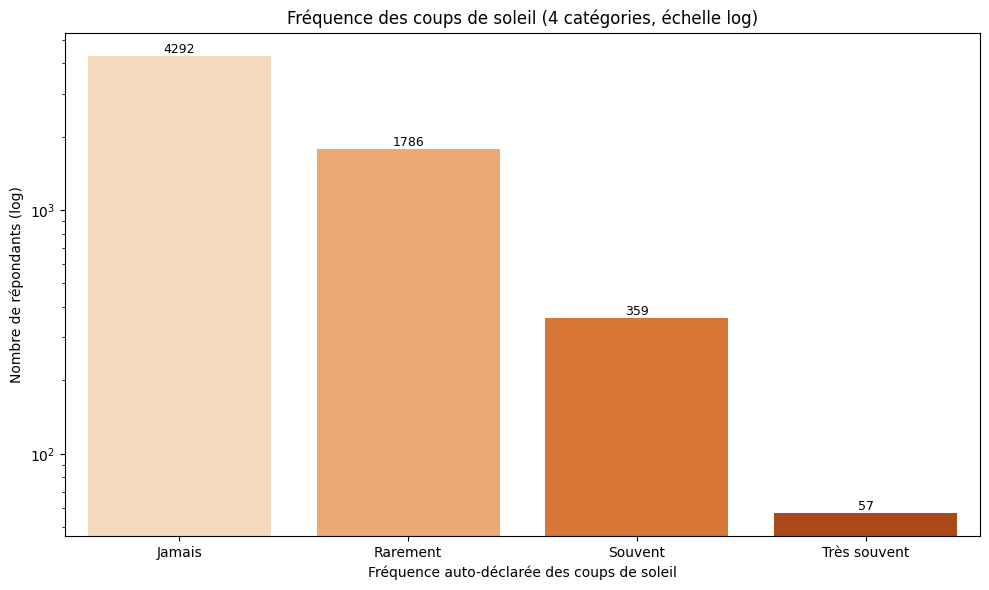

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt


# Mappage en 4 fréquences
frequency_map_4 = {
    -1: "Aucune réponse / Manquant",
    0: "Jamais",
    1: "Rarement", 2: "Rarement", 3: "Rarement",
    4: "Souvent", 5: "Souvent", 6: "Souvent", 7: "Souvent", 8: "Souvent", 9: "Souvent", 10: "Souvent",
    11: "Très souvent", 12: "Très souvent", 14: "Très souvent", 15: "Très souvent", 16: "Très souvent", 20: "Très souvent",
    25: "Très souvent", 30: "Très souvent", 36: "Très souvent", 40: "Très souvent", 50: "Très souvent",
    65: "Très souvent", 90: "Très souvent", 99: "Très souvent"
}
# Appliquer le mappage
# Change this line to assign to df_final instead of df
df_final["TimesSunburned_Frequency"] = df_final["TimesSunburned"].map(frequency_map_4)
# Ordre logique sans la catégorie "manquante"
frequency_order_4 = ["Jamais", "Rarement", "Souvent", "Très souvent"]
# Compter les fréquences et exclure les réponses manquantes
filtered_df_final = df_final[df_final["TimesSunburned_Frequency"] != "Aucune réponse / Manquant"]
frequency_counts_4 = (
    filtered_df_final["TimesSunburned_Frequency"]
    .value_counts()
    .reindex(frequency_order_4)
    .fillna(0)
)
# Tracer le graphique
plt.figure(figsize=(10, 6))
bars = sns.barplot(x=frequency_counts_4.index, y=frequency_counts_4.values, palette='Oranges')
plt.yscale('log')  # Échelle logarithmique
plt.title("Fréquence des coups de soleil (4 catégories, échelle log)")
plt.ylabel("Nombre de répondants (log)")
plt.xlabel("Fréquence auto-déclarée des coups de soleil")
# Ajouter les valeurs au-dessus des barres
for index, value in enumerate(frequency_counts_4.values):
    if value > 0:
        bars.text(index, value, f'{int(value)}', ha='center', va='bottom', fontsize=9)
plt.tight_layout()
plt.show()

In [81]:
df_final['TimesSunburned_Frequency']

,TimesSunburned_Frequency
0,NaN
1,Souvent
2,Souvent
3,Rarement
4,Rarement
...,...
7273,Rarement
7274,Jamais
7275,Jamais
7276,Rarement


##### AgeGroup

In [82]:
df_final['Age'].value_counts()

,count
Age,
70.0,168
68.0,168
67.0,166
74.0,159
64.0,159
...,...
96.0,4
100.0,3
98.0,2


In [83]:
import pandas as pd
import plotly.express as px

# ✅ Supprimer les colonnes dupliquées
df_final = df_final.loc[:, ~df_final.columns.duplicated()]

# ✅ Nettoyage global
df_final = df_final.replace(-1, pd.NA)

# ✅ Créer la variable AgeGroup si elle n'existe pas
if 'AgeGroup' not in df_final.columns:
    bins = [18, 29, 39, 49, 59, 69, 79, 89, 120]
    labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90+']
    df_final = df_final[df_final['Age'].notna() & (df_final['Age'] >= 0)].copy()
    df_final['AgeGroup'] = pd.cut(df_final['Age'], bins=bins, labels=labels, right=True)

# ✅ Variables explicatives et cibles
features = ['AgeGroup']
target_vars = ['CaSkin', 'CaBreast', 'CaProstate', 'CaMelanoma', 'CaCervical']

for target in target_vars:
    if target not in df_final.columns:
        print(f"❌ Colonne absente : {target}")
        continue

    print(f"\n📊 Analyse pour : {target}")

    features_present = [f for f in features if f in df_final.columns]
    columns_to_use = features_present + [target]

    df_filtered = df_final[columns_to_use].dropna()
    df_filtered = df_filtered[df_filtered[target].isin([0, 1])]
    df_filtered[target] = df_filtered[target].astype(float)

    for feature in features_present:
        print(f"\n🔸 {feature} vs {target}")

        cross_tab = pd.crosstab(df_filtered[feature], df_filtered[target], normalize='index') * 100

        for col in [0.0, 1.0]:
            if col not in cross_tab.columns:
                cross_tab[col] = 0
        cross_tab = cross_tab[[0.0, 1.0]]

        df_plot = cross_tab.reset_index().melt(id_vars=feature, var_name=target, value_name='Pourcentage')
        df_plot[target] = df_plot[target].map({0.0: 'Non', 1.0: 'Oui'})

        fig = px.bar(
            df_plot,
            x=feature,
            y='Pourcentage',
            color=target,
            barmode='stack',
            text_auto=True,
            title=f"{target} selon '{feature}'"
        )
        fig.update_layout(xaxis_title=feature, yaxis_title="Pourcentage (%)")
        fig.show()




📊 Analyse pour : CaSkin

🔸 AgeGroup vs CaSkin



📊 Analyse pour : CaBreast

🔸 AgeGroup vs CaBreast



📊 Analyse pour : CaProstate

🔸 AgeGroup vs CaProstate



📊 Analyse pour : CaMelanoma

🔸 AgeGroup vs CaMelanoma



📊 Analyse pour : CaCervical

🔸 AgeGroup vs CaCervical


In [84]:
df_final['AgeGroup']

,AgeGroup
0,60-69
1,60-69
2,30-39
3,60-69
4,60-69
...,...
7273,60-69
7274,30-39
7275,80-89
7276,70-79


#####CutSkipMeals22

In [85]:
df_final['CutSkipMeals2'].value_counts()

,count
CutSkipMeals2,
5.0,5041
4.0,629
3.0,553
2.0,207
1.0,191


In [86]:
import pandas as pd
import plotly.express as px

# Vérification des colonnes
assert 'CutSkipMeals2' in df_final.columns
assert 'CaSkin' in df_final.columns

# Nettoyage
df_final['CutSkipMeals2'] = pd.to_numeric(df_final['CutSkipMeals2'], errors='coerce')
df_final['CaSkin'] = pd.to_numeric(df_final['CaSkin'], errors='coerce')

def classify_cut(value):
    if pd.isna(value) or value < 0:
        return 'Inconnu'
    elif value in [0, 1, 2, 3, 4]:
        return 'oui'
    elif value == 5:
        return 'non'
    else:
        return 'Inconnu'

df_final['CutSkipMeals2_Cat'] = df_final['CutSkipMeals2'].apply(classify_cut)

# Préparation
df_filtered = df_final[['CutSkipMeals2_Cat', 'CaSkin']].dropna()
df_filtered = df_filtered[df_filtered['CaSkin'].isin([0, 1])]

# Crosstab
cross_tab = pd.crosstab(df_filtered['CutSkipMeals2_Cat'], df_filtered['CaSkin'], normalize='index') * 100
for col in [0, 1]:
    if col not in cross_tab.columns:
        cross_tab[col] = 0
cross_tab = cross_tab[[0, 1]]
cross_tab.columns = ['Non', 'Oui']

df_plot = cross_tab.reset_index().melt(id_vars='CutSkipMeals2_Cat', var_name='Cancer', value_name='Pourcentage')

# Graphique
fig = px.bar(
    df_plot,
    x='CutSkipMeals2_Cat',
    y='Pourcentage',
    color='Cancer',
    barmode='stack',
    text='Pourcentage',
    title="Présence de CaSkin selon la fréquence de repas sautés"
)
fig.update_layout(
    xaxis_title="Fréquence de repas sautés (catégorisée)",
    yaxis_title="Pourcentage (%)",
    legend_title="Cancer"
)
fig.show()


In [87]:
df_final['CutSkipMeals2_Cat']

,CutSkipMeals2_Cat
0,non
1,non
2,oui
3,non
4,non
...,...
7273,oui
7274,non
7275,non
7276,oui


## IV. Test Chii*2

Le test du Chi² permet de détecter s’il existe une relation significative entre deux variables catégorielles.Nous l'utilisons ici pour analyser les liens possibles entre certains comportements et le fait d’avoir eu un cancer.
Une p-value inférieure à 0.05 indique une dépendance statistique entre les variables.

In [88]:
df_final['EverHadCancer']

,EverHadCancer
0,0.0
1,0.0
2,0.0
3,0.0
4,1.0
...,...
7273,0.0
7274,0.0
7275,0.0
7276,0.0


In [89]:
df_final.columns.tolist()

['FreqGoProvider',
 'QualityCare',
 'TrustHCSystem',
 'HadTest3_Ancestry2',
 'HadTest3_PersonalTrait',
 'HadTest3_SpecificDisease',
 'HadTest3_Prenatal',
 'HadTest3_Other',
 'HadTest3_NotSure',
 'HadTest3_NotHad',
 'HadTest3_Cat',
 'ReasonTest_DocRec',
 'ReasonTest_UnderstandFam',
 'ReasonTest_FindFam',
 'ReasonTest_PersTraits',
 'ReasonTest_DiseaseRisk',
 'ReasonTest_LearnStrategies',
 'ReasonTest_Prenatal',
 'ReasonTest_Gift',
 'ReasonTest_Other',
 'ReasonTest_Other_OS',
 'ReasonTest_Cat',
 'GeneralHealth',
 'OwnAbilityTakeCareHealth',
 'HealthLimits_Deaf',
 'HealthLimits_Blind',
 'HealthLimits_Mobility',
 'HealthLimits_Pain',
 'MedConditions_Diabetes',
 'MedConditions_HighBP',
 'MedConditions_HeartCondition',
 'MedConditions_LungDisease',
 'MedConditions_Depression',
 'SleepWeekdayHr',
 'SleepWeekendHr2',
 'LittleInterest',
 'Hopeless',
 'Nervous',
 'Worrying',
 'FeelLeftOut',
 'FeelPeopleBarelyKnow',
 'FeelIsolated',
 'FeelPeopleNotWithMe',
 'TimesModerateExercise',
 'HowLongModera

In [90]:
df_final.duplicated().sum()

0

In [91]:
df_final['BirthSex']

,BirthSex
0,2.0
1,1.0
2,1.0
3,2.0
4,1.0
...,...
7273,1.0
7274,1.0
7275,1.0
7276,2.0


In [92]:
df_final['EverHadCancer']

,EverHadCancer
0,0.0
1,0.0
2,0.0
3,0.0
4,1.0
...,...
7273,0.0
7274,0.0
7275,0.0
7276,0.0


In [93]:
df = df.loc[:, ~df.T.duplicated()].copy()
df = df.loc[:, ~df.columns.duplicated()].copy()

In [94]:
# Liste des colonnes à vérifier
cols = ['FreqGoProvider', 'HadTest3_SpecificDisease', 'HadTest3_Prenatal',
        'ReasonTest_DocRec','ReasonTest_DiseaseRisk', 'Fruit2', 'Vegetables2',
        'CutSkipMeals2_cat', 'LackTransportation2', 'DiffPayMedBills', 'SmokeNow',
        'MarijuanaUseReason', 'DocTalkLDCT', 'DocTellColorectalTests2', 'FamilyEverHadCancer2']

# Ne garde que les colonnes qui existent réellement dans df_final
cols_existantes = [col for col in cols if col in df_final.columns]

# Ajoute la cible
cols_existantes += ['EverHadCancer']

# Applique le filtre sur les colonnes valides
df_correlation = df_final[(df_final[cols_existantes] != -1).all(axis=1)]


In [95]:
from scipy.stats import chi2_contingency
import pandas as pd

def chi2_analysis(df, target_col, feature_cols):
    results = []

    for col in feature_cols:
        # Filtrer les -1 dans les deux colonnes
        subset = df[(df[col] != -1) & (df[target_col] != -1)][[target_col, col]]

        # Vérification qu'on a au moins 2 modalités dans chaque colonne
        if subset[col].nunique() > 1 and subset[target_col].nunique() > 1:
            table = pd.crosstab(subset[col], subset[target_col])
            chi2, p, dof, expected = chi2_contingency(table)

            result = {
                "Variable": col,
                "Chi2": chi2,
                "p-value": p,
                "Dépendance": "Oui" if p < 0.05 else "Non"
            }
            results.append(result)
        else:
            results.append({
                "Variable": col,
                "Chi2": None,
                "p-value": None,
                "Dépendance": "Données insuffisantes"
            })

    return pd.DataFrame(results)


In [96]:
def remove_duplicate_columns(df):
    """
    Supprime les colonnes dupliquées d'un DataFrame en gardant la première occurrence.

    Paramètres :
    df (pd.DataFrame) : Le DataFrame à nettoyer.

    Retourne :
    pd.DataFrame : Un nouveau DataFrame sans colonnes dupliquées.
    """
    return df.loc[:, ~df.columns.duplicated()]


In [97]:
df_final = remove_duplicate_columns(df_final)

In [98]:
cols_to_test = [
    'FreqGoProvider', 'HadTest3_SpecificDisease', 'HadTest3_Prenatal',
    'ReasonTest_DocRec','ReasonTest_DiseaseRisk', 'Fruit2', 'Vegetables2',
    'CutSkipMeals2', 'LackTransportation2', 'DiffPayMedBills', 'SmokeNow',
    'MarijuanaUseReason', 'DocTalkLDCT', 'DocTellColorectalTests2','FamilyEverHadCancer2'
]

# Re-create df_final and remove duplicate columns
df_final = pd.concat([df_health_Care, df_Genetic_Testing, df_overall_health, df_Environment_Health, df_financial_concern, df_Health_Nutrition, df_alcool, df_tabacco_product, df_diagnosed_cancer, df_Household, df_Person_w], axis=1)
df_final = df_final.loc[:,~df_final.columns.duplicated()]


# Filter cols_to_test to include only columns present in df_final
cols_to_test = [col for col in cols_to_test if col in df_final.columns]

chi2_results = chi2_analysis(df_final, 'EverHadCancer', cols_to_test)
chi2_results

,Variable,Chi2,p-value,Dépendance
0,FreqGoProvider,280.208618,1.417568e-57,Oui
1,HadTest3_SpecificDisease,118.474952,1.364666e-27,Oui
2,HadTest3_Prenatal,7.139179,7.541768e-03,Oui
3,ReasonTest_DocRec,24.552792,7.230152e-07,Oui
4,ReasonTest_DiseaseRisk,46.919921,7.394722e-12,Oui
5,Fruit2,5.246093,5.126594e-01,Non
6,Vegetables2,12.015636,6.162089e-02,Non
7,CutSkipMeals2,44.710607,4.566680e-09,Oui
8,LackTransportation2,20.938292,3.257157e-04,Oui
9,DiffPayMedBills,30.621204,3.657296e-06,Oui


### Top 5 des cancers les plus fréquents

###### Pour orienter notre analyse sur les types de cancer les plus significatifs, nous avons sélectionné les 5 formes de cancer comptant le plus grand nombre de cas déclarés dans notre dataset. Cette étape permet de focaliser l'étude sur les pathologies les plus représentées, facilitant ainsi une analyse plus pertinente des facteurs associés.

In [99]:
df3 = pd.concat([df_diagnosed_cancer, df_Person_w], axis=1)
df3

,CaBladder,CaBone,CaBreast,CaBrain,CaCervical,CaColon,CaEndometrial,CaEye,CaHeadNeck,CaLeukemia,CaLiver,CaLung,CaHodgkins,CaNonHodgkin,CaMelanoma,CaMultMyeloma,CaOral,CaOvarian,CaPancreatic,CaPharyngeal,CaProstate,CaRectal,CaRenal,CaSkin,CaStomach,CaTesticular,CaThyroid,CaOther,CaOther_OS,Cancer_Cat,WhenDiagnosedCancer,FamilyEverHadCancer2,EverHadCancer,PERSON_FINWT0,PERSON_FINWT1,PERSON_FINWT2,PERSON_FINWT3,PERSON_FINWT4,PERSON_FINWT5,PERSON_FINWT6,PERSON_FINWT7,PERSON_FINWT8,PERSON_FINWT9,PERSON_FINWT10,PERSON_FINWT11,PERSON_FINWT12,PERSON_FINWT13,PERSON_FINWT14,PERSON_FINWT15,PERSON_FINWT16,PERSON_FINWT17,PERSON_FINWT18,PERSON_FINWT19,PERSON_FINWT20,PERSON_FINWT21,PERSON_FINWT22,PERSON_FINWT23,PERSON_FINWT24,PERSON_FINWT25,PERSON_FINWT26,PERSON_FINWT27,PERSON_FINWT28,PERSON_FINWT29,PERSON_FINWT30,PERSON_FINWT31,PERSON_FINWT32,PERSON_FINWT33,PERSON_FINWT34,PERSON_FINWT35,PERSON_FINWT36,PERSON_FINWT37,PERSON_FINWT38,PERSON_FINWT39,PERSON_FINWT40,PERSON_FINWT41,PERSON_FINWT42,PERSON_FINWT43,PERSON_FINWT44,PERSON_FINWT45,PERSON_FINWT46,PERSON_FINWT47,PERSON_FINWT48,PERSON_FINWT49,PERSON_FINWT50
0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1,-1.0,-1.0,1.0,0.0,30709.903260,31722.800441,31737.148813,31400.378607,31022.603146,31878.474219,31406.540311,31639.510708,31090.230072,31830.697531,30938.432257,31889.723258,31265.344080,31472.005412,30938.615327,31547.315534,31711.938813,31140.868634,31767.234535,31357.241394,30877.072950,31038.447150,31563.206020,31306.518291,30537.833546,31435.745728,31908.482150,31731.727338,31590.090485,30406.218866,31834.856075,30747.987822,31068.725376,31274.122407,31381.872163,31342.723308,0.000000,31281.835078,31496.458203,31560.150548,31348.006471,32056.096361,31082.333128,31429.742759,30008.120683,30214.530862,31073.120625,31564.242302,31175.926712,32219.689640,31099.465739
1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1,-1.0,-1.0,1.0,0.0,18967.337955,19218.993931,19080.481978,19127.536925,18933.344459,19253.878157,19707.430724,19397.513806,19428.890180,19724.475222,19606.305142,19499.956524,19557.698133,18921.914036,19764.390794,19458.163332,19494.268339,19338.900780,19009.179505,19604.710196,18961.120154,19594.277211,0.000000,19395.123206,19210.859678,19765.729446,19464.398521,19507.083696,19644.735427,19299.272608,19454.528627,19167.237143,19823.053174,19005.946116,19047.206039,19829.271747,18941.882941,19013.307272,20667.721246,19178.147079,19809.241703,18869.508796,19470.432467,19151.391740,19291.208225,19166.271687,19227.870111,19185.121521,19061.780732,19448.725863,18818.979184
2,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1,-1.0,-1.0,1.0,0.0,6204.341016,6453.247721,6276.403868,6406.143827,6246.127598,6238.897786,6344.101346,0.000000,6301.286326,6305.906408,6341.697541,6569.962625,6243.061438,6091.597379,6302.202057,6206.038189,6310.042027,6231.111196,6193.090553,6257.314327,6408.147075,6313.882337,6549.843055,6319.778710,6544.642522,6219.603674,6273.018168,6331.999440,6417.419087,6363.526849,6281.506880,6469.269222,6374.392643,6337.686263,6446.424013,6271.416461,6032.294571,6287.262995,6297.388540,6367.020166,6274.911628,6254.708604,6353.369599,6354.194099,6221.316693,6289.059721,6456.959339,6356.396152,6620.520696,6356.355638,6398.357175
3,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1,-1.0,-1.0,0.0,0.0,83749.832638,84584.337335,84792.921660,87584.953483,86238.039515,86543.169681,86769.898513,88041.786447,84961.192367,85487.830169,83987.643060,86496.323266,84416.427939,85980.596780,82837.550609,87388.082206,86090.361725,83725.399082,85390.090123,85901.224971,84899.692849,85378.466958,84827.553881,85286.13847

In [100]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7278 entries, 0 to 7277
Data columns (total 84 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaBladder             7278 non-null   float64
 1   CaBone                7278 non-null   float64
 2   CaBreast              7278 non-null   float64
 3   CaBrain               7278 non-null   float64
 4   CaCervical            7278 non-null   float64
 5   CaColon               7278 non-null   float64
 6   CaEndometrial         7278 non-null   float64
 7   CaEye                 7278 non-null   float64
 8   CaHeadNeck            7278 non-null   float64
 9   CaLeukemia            7278 non-null   float64
 10  CaLiver               7278 non-null   float64
 11  CaLung                7278 non-null   float64
 12  CaHodgkins            7278 non-null   float64
 13  CaNonHodgkin          7278 non-null   float64
 14  CaMelanoma            7278 non-null   float64
 15  CaMultMyeloma        

In [101]:
# Liste des colonnes de type cancer (selon ton message)
cancer_cols = [
    'CaBladder', 'CaBone', 'CaBreast', 'CaBrain', 'CaCervical', 'CaColon',
    'CaEndometrial', 'CaEye', 'CaHeadNeck', 'CaLeukemia', 'CaLiver', 'CaLung',
    'CaHodgkins', 'CaNonHodgkin', 'CaMelanoma', 'CaMultMyeloma', 'CaOral',
    'CaOvarian', 'CaPancreatic', 'CaPharyngeal', 'CaProstate', 'CaRectal',
    'CaRenal', 'CaSkin', 'CaStomach', 'CaTesticular', 'CaThyroid'
]

# Compter le nombre de cas (valeur == 1)
cancer_counts = {col: (df[col] == 1).sum() for col in cancer_cols}

# Convertir en DataFrame et trier
cancer_df = pd.DataFrame.from_dict(cancer_counts, orient='index', columns=['Nombre_de_cas'])
cancer_df_sorted = cancer_df.sort_values(by='Nombre_de_cas', ascending=False)

# Afficher les 5 cancers les plus fréquents
top_5_cancers = cancer_df_sorted.head(5)
print(top_5_cancers)

            Nombre_de_cas
CaSkin                337
CaBreast              208
CaProstate            162
CaMelanoma            108
CaCervical             72


### Sélection des variables liées aux habitudes de vie

###### Dans cette section, nous avons sélectionné un ensemble de variables issues du questionnaire initial, centrées sur les habitudes de vie des participants. L’objectif est d’identifier des facteurs potentiellement liés au mode de vie (alimentation, sommeil, stress, activité physique, consommation d’alcool, situation familiale et conditions économiques). Ces variables serviront de base à nos futures analyses exploratoires et statistiques pour mieux comprendre leur lien possible avec l’état de santé général ou le risque de cancer.

In [102]:
df_Variable= ['CutSkipMeals2_cat',
    'DiffPayMedBills', 'SmokeNow',
    'MedConditions_Diabetes', 'MedConditions_HighBP', 'MedConditions_HeartCondition',
    'MedConditions_LungDisease', 'MedConditions_Depression', 'GeneralHealth', 'HealthLimits_Pain', 'Nervous',
    'IncomeRanges', 'Education', 'Fruit2', 'Vegetables2', 'TimesSunburned_Frequency', 'DrinkFreqCategory',
    'ChildrenInHH', 'TotalHousehold','AgeGroup', 'SleepCategory','Mexican','PuertoRican','Cuban','OthHisp','Hisp_Cat','White','Black','AmerInd','AsInd',
    'Chinese','Filipino','Japanese','Korean','Vietnamese','OthAsian','OthPacIsl'
]

## V. Crosstab & barplots : visualisation conditionnelle des différents types de Cancer

##### Nous avons automatisé l'exploration bivariée entre nos variables cibles (`CaSkin`, `CaBreast`, `CaProstate`, `CaMelanoma` et `CaCervical`) et une série de variables explicatives (habitudes de vie, nutrition, santé mentale, etc.). Pour chaque variable, un graphique en barres empilées montre la proportion de cas positifs et négatifs de cancer de la peau, permettant ainsi d’identifier visuellement des tendances intéressantes.


In [103]:
# Variables (définies selon l'ordre logique pour le preprocessor)
# 3. Définir les variables
binary_vars = ['CutSkipMeals2','DiffPayMedBills','SmokeNow', 'MedConditions_Diabetes','MedConditions_HighBP','MedConditions_HeartCondition',
                 'MedConditions_LungDisease', 'MedConditions_Depression', 'BirthSex', 'FamilyEverHadCancer2']

ordinal_vars = ['GeneralHealth','HealthLimits_Pain', 'Nervous', 'IncomeRanges', 'Education']
string_categorical_vars = [
    'Mexican','PuertoRican','Cuban','OthHisp','Hisp_Cat','White','Black','AmerInd','AsInd',
    'Chinese','Filipino','Japanese','Korean','Vietnamese','OthAsian','OthPacIsl'
]
continuous_vars = [
    'Fruit2', 'Vegetables2', 'TimesStrengthTraining', 'Drink_nb_PerMonth',
    'ChildrenInHH', 'TotalHousehold', 'TimesSunburned', 'BMI', 'Age', 'SleepWeekdayHr'
]
target = 'EverHadCancer'

In [104]:
print(df_final.columns[df_final.columns.duplicated()])

Index([], dtype='object')


In [105]:
df_final = df_final.loc[:, ~df_final.columns.duplicated()]

### 1. Les variables Binaire

In [106]:
import pandas as pd
import plotly.express as px

# ✅ Variables explicatives communes
features = [
    'CutSkipMeals2_cat',
    'DiffPayMedBills', 'SmokeNow',
    'MedConditions_Diabetes', 'MedConditions_HighBP', 'MedConditions_HeartCondition',
    'MedConditions_LungDisease', 'MedConditions_Depression'
]

# ✅ Liste des colonnes cibles (cancers)
target_vars = ['CaSkin', 'CaBreast', 'CaProstate', 'CaMelanoma', 'CaCervical']

for target in target_vars:
    if target not in df_final.columns:
        print(f"❌ Colonne absente : {target}")
        continue

    print(f"\n📊 Analyse pour : {target}")

    # ✅ Vérifie que toutes les colonnes sont là
    features_present = [f for f in features if f in df_final.columns]
    columns_to_use = features_present + [target]

    # ✅ Nettoyage (-1 → NaN, drop des lignes incomplètes)
    df_filtered = df_final[columns_to_use].replace(-1, pd.NA).dropna()

    # ✅ Supprimer les lignes contenant 'Inconnu'
    for col in features_present:
        df_filtered = df_filtered[df_filtered[col] != 'Inconnu']

    # ✅ Forcer les valeurs cibles à 0.0 / 1.0 uniquement (si d'autres valeurs existent)
    df_filtered = df_filtered[df_filtered[target].isin([0, 1, 0.0, 1.0])]
    df_filtered[target] = df_filtered[target].astype(float)

    for feature in features_present:
        print(f"\n🔸 {feature} vs {target}")

        # Crosstab normalisé
        cross_tab = pd.crosstab(df_filtered[feature], df_filtered[target], normalize='index') * 100

        # Forcer les colonnes 0.0 et 1.0 même si absentes
        for col in [0.0, 1.0]:
            if col not in cross_tab.columns:
                cross_tab[col] = 0
        cross_tab = cross_tab[[0.0, 1.0]]  # ordre fixe

        # ✅ Préparation graphique
        cross_tab.index.name = feature
        df_plot = cross_tab.reset_index().melt(id_vars=feature, var_name=target, value_name='Pourcentage')
        df_plot[target] = df_plot[target].map({0.0: 'Non', 1.0: 'Oui'})

        fig = px.bar(
            df_plot,
            x=feature,
            y='Pourcentage',
            color=target,
            barmode='stack',
            text_auto=True,
            title=f"{target} selon '{feature}'"
        )
        fig.show()


📊 Analyse pour : CaSkin

🔸 DiffPayMedBills vs CaSkin



🔸 SmokeNow vs CaSkin



🔸 MedConditions_Diabetes vs CaSkin



🔸 MedConditions_HighBP vs CaSkin



🔸 MedConditions_HeartCondition vs CaSkin



🔸 MedConditions_LungDisease vs CaSkin



🔸 MedConditions_Depression vs CaSkin



📊 Analyse pour : CaBreast

🔸 DiffPayMedBills vs CaBreast



🔸 SmokeNow vs CaBreast



🔸 MedConditions_Diabetes vs CaBreast



🔸 MedConditions_HighBP vs CaBreast



🔸 MedConditions_HeartCondition vs CaBreast



🔸 MedConditions_LungDisease vs CaBreast



🔸 MedConditions_Depression vs CaBreast



📊 Analyse pour : CaProstate

🔸 DiffPayMedBills vs CaProstate



🔸 SmokeNow vs CaProstate



🔸 MedConditions_Diabetes vs CaProstate



🔸 MedConditions_HighBP vs CaProstate



🔸 MedConditions_HeartCondition vs CaProstate



🔸 MedConditions_LungDisease vs CaProstate



🔸 MedConditions_Depression vs CaProstate



📊 Analyse pour : CaMelanoma

🔸 DiffPayMedBills vs CaMelanoma



🔸 SmokeNow vs CaMelanoma



🔸 MedConditions_Diabetes vs CaMelanoma



🔸 MedConditions_HighBP vs CaMelanoma



🔸 MedConditions_HeartCondition vs CaMelanoma



🔸 MedConditions_LungDisease vs CaMelanoma



🔸 MedConditions_Depression vs CaMelanoma



📊 Analyse pour : CaCervical

🔸 DiffPayMedBills vs CaCervical



🔸 SmokeNow vs CaCervical



🔸 MedConditions_Diabetes vs CaCervical



🔸 MedConditions_HighBP vs CaCervical



🔸 MedConditions_HeartCondition vs CaCervical



🔸 MedConditions_LungDisease vs CaCervical



🔸 MedConditions_Depression vs CaCervical


### 2. Les Variables Catégorielles Ordinales

In [107]:
import pandas as pd
import plotly.express as px

# ✅ Variables explicatives communes
features = [
    'GeneralHealth', 'HealthLimits_Pain', 'Nervous',
    'IncomeRanges', 'Education'
]

# ✅ Liste des colonnes cibles (cancers)
target_vars = ['CaSkin', 'CaBreast', 'CaProstate', 'CaMelanoma', 'CaCervical']

for target in target_vars:
    if target not in df_final.columns:
        print(f"❌ Colonne absente : {target}")
        continue

    print(f"\n📊 Analyse pour : {target}")

    # ✅ Vérifie que toutes les colonnes sont là
    features_present = [f for f in features if f in df_final.columns]
    columns_to_use = features_present + [target]

    # ✅ Nettoyage (-1 → NaN, drop des lignes incomplètes)
    df_filtered = df_final[columns_to_use].replace(-1, pd.NA).dropna()

    # ✅ Forcer les valeurs cibles à 0.0 / 1.0 uniquement (si d'autres valeurs existent)
    df_filtered = df_filtered[df_filtered[target].isin([0, 1, 0.0, 1.0])]
    df_filtered[target] = df_filtered[target].astype(float)

    for feature in features_present:
        print(f"\n🔸 {feature} vs {target}")

        # Crosstab normalisé
        cross_tab = pd.crosstab(df_filtered[feature], df_filtered[target], normalize='index') * 100

        # Forcer les colonnes 0.0 et 1.0 même si absentes
        for col in [0.0, 1.0]:
            if col not in cross_tab.columns:
                cross_tab[col] = 0
        cross_tab = cross_tab[[0.0, 1.0]]  # ordre fixe

        # ✅ Préparation graphique
        cross_tab.index.name = feature
        df_plot = cross_tab.reset_index().melt(id_vars=feature, var_name=target, value_name='Pourcentage')
        df_plot[target] = df_plot[target].map({0.0: 'Non', 1.0: 'Oui'})

        fig = px.bar(
            df_plot,
            x=feature,
            y='Pourcentage',
            color=target,
            barmode='stack',
            text_auto=True,
            title=f"{target} selon '{feature}'"
        )
        fig.show()


📊 Analyse pour : CaSkin

🔸 GeneralHealth vs CaSkin



🔸 HealthLimits_Pain vs CaSkin



🔸 Nervous vs CaSkin



🔸 IncomeRanges vs CaSkin



🔸 Education vs CaSkin



📊 Analyse pour : CaBreast

🔸 GeneralHealth vs CaBreast



🔸 HealthLimits_Pain vs CaBreast



🔸 Nervous vs CaBreast



🔸 IncomeRanges vs CaBreast



🔸 Education vs CaBreast



📊 Analyse pour : CaProstate

🔸 GeneralHealth vs CaProstate



🔸 HealthLimits_Pain vs CaProstate



🔸 Nervous vs CaProstate



🔸 IncomeRanges vs CaProstate



🔸 Education vs CaProstate



📊 Analyse pour : CaMelanoma

🔸 GeneralHealth vs CaMelanoma



🔸 HealthLimits_Pain vs CaMelanoma



🔸 Nervous vs CaMelanoma



🔸 IncomeRanges vs CaMelanoma



🔸 Education vs CaMelanoma



📊 Analyse pour : CaCervical

🔸 GeneralHealth vs CaCervical



🔸 HealthLimits_Pain vs CaCervical



🔸 Nervous vs CaCervical



🔸 IncomeRanges vs CaCervical



🔸 Education vs CaCervical


### 3. Variables Catégorielles Textuelles

In [108]:
import pandas as pd
import plotly.express as px

# ✅ Variables explicatives communes
features = [
    'Mexican','PuertoRican','Cuban','OthHisp','Hisp_Cat','White','Black','AmerInd','AsInd',
    'Chinese','Filipino','Japanese','Korean','Vietnamese','OthAsian','OthPacIsl'
]

# ✅ Liste des colonnes cibles (cancers)
target_vars = ['CaSkin', 'CaBreast', 'CaProstate', 'CaMelanoma', 'CaCervical']

for target in target_vars:
    if target not in df_final.columns:
        print(f"❌ Colonne absente : {target}")
        continue

    print(f"\n📊 Analyse pour : {target}")

    # ✅ Vérifie que toutes les colonnes sont là
    features_present = [f for f in features if f in df_final.columns]
    columns_to_use = features_present + [target]

    # ✅ Nettoyage (-1 → NaN, drop des lignes incomplètes)
    df_filtered = df_final[columns_to_use].replace(-1, pd.NA).dropna()

    # ✅ Forcer les valeurs cibles à 0.0 / 1.0 uniquement (si d'autres valeurs existent)
    df_filtered = df_filtered[df_filtered[target].isin([0, 1, 0.0, 1.0])]
    df_filtered[target] = df_filtered[target].astype(float)

    for feature in features_present:
        print(f"\n🔸 {feature} vs {target}")

        # Crosstab normalisé
        cross_tab = pd.crosstab(df_filtered[feature], df_filtered[target], normalize='index') * 100

        # Forcer les colonnes 0.0 et 1.0 même si absentes
        for col in [0.0, 1.0]:
            if col not in cross_tab.columns:
                cross_tab[col] = 0
        cross_tab = cross_tab[[0.0, 1.0]]  # ordre fixe

        # ✅ Préparation graphique
        cross_tab.index.name = feature
        df_plot = cross_tab.reset_index().melt(id_vars=feature, var_name=target, value_name='Pourcentage')
        df_plot[target] = df_plot[target].map({0.0: 'Non', 1.0: 'Oui'})

        fig = px.bar(
            df_plot,
            x=feature,
            y='Pourcentage',
            color=target,
            barmode='stack',
            text_auto=True,
            title=f"{target} selon '{feature}'"
        )
        fig.show()


📊 Analyse pour : CaSkin

🔸 Mexican vs CaSkin



🔸 PuertoRican vs CaSkin



🔸 Cuban vs CaSkin



🔸 OthHisp vs CaSkin



🔸 Hisp_Cat vs CaSkin



🔸 White vs CaSkin



🔸 Black vs CaSkin



🔸 AmerInd vs CaSkin



🔸 AsInd vs CaSkin



🔸 Chinese vs CaSkin



🔸 Filipino vs CaSkin



🔸 Japanese vs CaSkin



🔸 Korean vs CaSkin



🔸 Vietnamese vs CaSkin



🔸 OthAsian vs CaSkin



🔸 OthPacIsl vs CaSkin



📊 Analyse pour : CaBreast

🔸 Mexican vs CaBreast



🔸 PuertoRican vs CaBreast



🔸 Cuban vs CaBreast



🔸 OthHisp vs CaBreast



🔸 Hisp_Cat vs CaBreast



🔸 White vs CaBreast



🔸 Black vs CaBreast



🔸 AmerInd vs CaBreast



🔸 AsInd vs CaBreast



🔸 Chinese vs CaBreast



🔸 Filipino vs CaBreast



🔸 Japanese vs CaBreast



🔸 Korean vs CaBreast



🔸 Vietnamese vs CaBreast



🔸 OthAsian vs CaBreast



🔸 OthPacIsl vs CaBreast



📊 Analyse pour : CaProstate

🔸 Mexican vs CaProstate



🔸 PuertoRican vs CaProstate



🔸 Cuban vs CaProstate



🔸 OthHisp vs CaProstate



🔸 Hisp_Cat vs CaProstate



🔸 White vs CaProstate



🔸 Black vs CaProstate



🔸 AmerInd vs CaProstate



🔸 AsInd vs CaProstate



🔸 Chinese vs CaProstate



🔸 Filipino vs CaProstate



🔸 Japanese vs CaProstate



🔸 Korean vs CaProstate



🔸 Vietnamese vs CaProstate



🔸 OthAsian vs CaProstate



🔸 OthPacIsl vs CaProstate



📊 Analyse pour : CaMelanoma

🔸 Mexican vs CaMelanoma



🔸 PuertoRican vs CaMelanoma



🔸 Cuban vs CaMelanoma



🔸 OthHisp vs CaMelanoma



🔸 Hisp_Cat vs CaMelanoma



🔸 White vs CaMelanoma



🔸 Black vs CaMelanoma



🔸 AmerInd vs CaMelanoma



🔸 AsInd vs CaMelanoma



🔸 Chinese vs CaMelanoma



🔸 Filipino vs CaMelanoma



🔸 Japanese vs CaMelanoma



🔸 Korean vs CaMelanoma



🔸 Vietnamese vs CaMelanoma



🔸 OthAsian vs CaMelanoma



🔸 OthPacIsl vs CaMelanoma



📊 Analyse pour : CaCervical

🔸 Mexican vs CaCervical



🔸 PuertoRican vs CaCervical



🔸 Cuban vs CaCervical



🔸 OthHisp vs CaCervical



🔸 Hisp_Cat vs CaCervical



🔸 White vs CaCervical



🔸 Black vs CaCervical



🔸 AmerInd vs CaCervical



🔸 AsInd vs CaCervical



🔸 Chinese vs CaCervical



🔸 Filipino vs CaCervical



🔸 Japanese vs CaCervical



🔸 Korean vs CaCervical



🔸 Vietnamese vs CaCervical



🔸 OthAsian vs CaCervical



🔸 OthPacIsl vs CaCervical


### 4. Variables Numériques Continues

In [109]:
import pandas as pd
import plotly.express as px

# ✅ Variables explicatives communes
features = [
    'Fruit2', 'Vegetables2', 'TimesSunburned_Frequency', 'DrinkFreqCategory',
    'ChildrenInHH', 'TotalHousehold','AgeGroup', 'SleepCategory'
]

# ✅ Liste des colonnes cibles (cancers)
target_vars = ['CaSkin', 'CaBreast', 'CaProstate', 'CaMelanoma', 'CaCervical']

for target in target_vars:
    if target not in df_final.columns:
        print(f"❌ Colonne absente : {target}")
        continue

    print(f"\n📊 Analyse pour : {target}")

    # ✅ Vérifie que toutes les colonnes sont là
    features_present = [f for f in features if f in df_final.columns]
    columns_to_use = features_present + [target]

    # ✅ Nettoyage (-1 → NaN, drop des lignes incomplètes)
    df_filtered = df_final[columns_to_use].replace(-1, pd.NA).dropna()

    # ✅ Forcer les valeurs cibles à 0.0 / 1.0 uniquement (si d'autres valeurs existent)
    df_filtered = df_filtered[df_filtered[target].isin([0, 1, 0.0, 1.0])]
    df_filtered[target] = df_filtered[target].astype(float)

    for feature in features_present:
        print(f"\n🔸 {feature} vs {target}")

        # Crosstab normalisé
        cross_tab = pd.crosstab(df_filtered[feature], df_filtered[target], normalize='index') * 100

        # Forcer les colonnes 0.0 et 1.0 même si absentes
        for col in [0.0, 1.0]:
            if col not in cross_tab.columns:
                cross_tab[col] = 0
        cross_tab = cross_tab[[0.0, 1.0]]  # ordre fixe

        # ✅ Préparation graphique
        cross_tab.index.name = feature
        df_plot = cross_tab.reset_index().melt(id_vars=feature, var_name=target, value_name='Pourcentage')
        df_plot[target] = df_plot[target].map({0.0: 'Non', 1.0: 'Oui'})

        fig = px.bar(
            df_plot,
            x=feature,
            y='Pourcentage',
            color=target,
            barmode='stack',
            text_auto=True,
            title=f"{target} selon '{feature}'"
        )
        fig.show()


📊 Analyse pour : CaSkin

🔸 Fruit2 vs CaSkin



🔸 Vegetables2 vs CaSkin



🔸 ChildrenInHH vs CaSkin



🔸 TotalHousehold vs CaSkin



📊 Analyse pour : CaBreast

🔸 Fruit2 vs CaBreast



🔸 Vegetables2 vs CaBreast



🔸 ChildrenInHH vs CaBreast



🔸 TotalHousehold vs CaBreast



📊 Analyse pour : CaProstate

🔸 Fruit2 vs CaProstate



🔸 Vegetables2 vs CaProstate



🔸 ChildrenInHH vs CaProstate



🔸 TotalHousehold vs CaProstate



📊 Analyse pour : CaMelanoma

🔸 Fruit2 vs CaMelanoma



🔸 Vegetables2 vs CaMelanoma



🔸 ChildrenInHH vs CaMelanoma



🔸 TotalHousehold vs CaMelanoma



📊 Analyse pour : CaCervical

🔸 Fruit2 vs CaCervical



🔸 Vegetables2 vs CaCervical



🔸 ChildrenInHH vs CaCervical



🔸 TotalHousehold vs CaCervical


## VI. Modélisation Prédictive avec Random Forest

Dans cette partie, nous utilisons l’algorithme Random Forest pour prédire la survenue d’un cancer à partir de différentes variables liées à la santé, aux habitudes de vie et aux facteurs socio-économiques. Ce modèle permet non seulement d’évaluer les performances de prédiction, mais aussi d’identifier les variables les plus influentes dans le processus de décision.

###A. Quel Modèle Prédit le Mieux ? Test avec PyCaret

In [1]:
pip install pycaret

#### PyCarret

In [110]:
from pycaret.classification import *

In [111]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score, recall_score, precision_score

# 1. Charger les données
df = pd.read_csv('df_final.csv')

# 2. Nettoyage : remplacer les -1 par NaN, supprimer les colonnes dupliquées
df.replace(-1, pd.NA, inplace=True)
df = df.loc[:, ~df.columns.duplicated()]

# 3. Définir les variables
binary_vars = ['CutSkipMeals2','DiffPayMedBills','SmokeNow', 'MedConditions_Diabetes','MedConditions_HighBP','MedConditions_HeartCondition',
                 'MedConditions_LungDisease', 'MedConditions_Depression', 'BirthSex', 'FamilyEverHadCancer2']

ordinal_vars = ['GeneralHealth','HealthLimits_Pain', 'Nervous', 'IncomeRanges', 'Education']
string_categorical_vars = [
    'Mexican','PuertoRican','Cuban','OthHisp','Hisp_Cat','White','Black','AmerInd','AsInd',
    'Chinese','Filipino','Japanese','Korean','Vietnamese','OthAsian','OthPacIsl'
]
continuous_vars = [
    'Fruit2', 'Vegetables2', 'TimesStrengthTraining', 'Drink_nb_PerMonth',
    'ChildrenInHH', 'TotalHousehold', 'TimesSunburned', 'BMI', 'Age', 'SleepWeekdayHr'
]
target = 'EverHadCancer'

features = binary_vars + ordinal_vars + continuous_vars + string_categorical_vars

# 5. Nettoyage final
df_final = df_final[features + [target]].dropna()

X = df_final[features].copy()
y = df_final[target]

# 6. Encodage manuel

# Ordinal encoding
encoder_ord = OrdinalEncoder()
X[ordinal_vars] = encoder_ord.fit_transform(X[ordinal_vars])

# One-hot encoding
encoder_ohe = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
ohe_array = encoder_ohe.fit_transform(X[string_categorical_vars])
ohe_columns = encoder_ohe.get_feature_names_out(string_categorical_vars)
df_ohe = pd.DataFrame(ohe_array, columns=ohe_columns, index=X.index)

# Standardisation (optionnelle)
scaler = StandardScaler()
X[continuous_vars] = scaler.fit_transform(X[continuous_vars])

# Concaténer toutes les features finales
X_final = pd.concat([
    X[binary_vars + ordinal_vars + continuous_vars],
    df_ohe
], axis=1)

# 7. Split & entraînement
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=1073, random_state=142)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1073, random_state=142)

,Description,Value
0,Session id,142
1,Target,EverHadCancer
2,Target type,Multiclass
3,Target mapping,"-1.0: 0, 0.0: 1, 1.0: 2"
4,Original data shape,"(7278, 42)"
5,Transformed data shape,"(7278, 42)"
6,Transformed train set shape,"(5094, 42)"
7,Transformed test set shape,"(2184, 42)"
8,Numeric features,41
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8477,0.8308,0.8477,0.8000,0.7953,0.4632,0.5297,0.6860
ridge,Ridge Classifier,0.8469,0.0000,0.8469,0.7656,0.7821,0.4463,0.5328,0.0630
et,Extra Trees Classifier,0.8467,0.8248,0.8467,0.7890,0.7935,0.4589,0.5254,0.9460
gbc,Gradient Boosting Classifier,0.8465,0.0000,0.8465,0.8046,0.8021,0.4741,0.5257,4.3940
lr,Logistic Regression,0.8459,0.0000,0.8459,0.7927,0.7934,0.4586,0.5228,2.5570
lda,Linear Discriminant Analysis,0.8445,0.0000,0.8445,0.7924,0.7937,0.4593,0.5182,0.0620
lightgbm,Light Gradient Boosting Machine,0.8408,0.8276,0.8408,0.7973,0.8061,0.4751,0.5069,1.6070
xgboost,Extreme Gradient Boosting,0.8357,0.8161,0.8357,0.7956,0.8061,0.4719,0.4944,0.3600
knn,K Neighbors Classifier,0.8261,0.7707,0.8261,0.7878,0.8012,0.4551,0.4695,0.1660
svm,SVM - Linear Kernel,0.8092,0.0000,0.8092,0.7715,0.7746,0.4257,0.4889,0.3300


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

Modèle sélectionné : RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=142, verbose=0,
                       warm_start=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

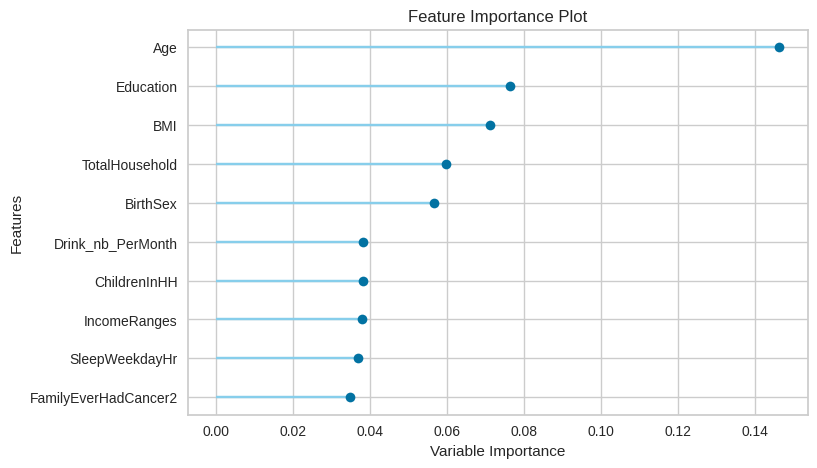

In [112]:
# 6. Initialiser l’environnement PyCaret
# 6. Initialiser l’environnement PyCaret
from pycaret.classification import *
clf_setup = setup(
    data=df_final,
    target='EverHadCancer',
    session_id=142,
    preprocess=True,  # encodage, normalisation, etc.
    ignore_features=[],  # tu peux exclure certaines colonnes si nécessaire
    categorical_features=None  # optionnel si PyCaret ne détecte pas tout seul
)

# 7. Comparer tous les modèles disponibles
best_model = compare_models()

# 8. Afficher les métriques du meilleur modèle
print("Modèle sélectionné :", best_model)

# 9. Évaluer graphiquement ce modèle
evaluate_model(best_model)

# 10. Interpréter l’importance des variables
plot_model(best_model, plot='feature')

# 11. (Optionnel) Sauvegarder le modèle
# save_model(best_model, 'modele_pycaret_cancer')


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8477,0.8308,0.8477,0.8000,0.7953,0.4632,0.5297,0.8510
ridge,Ridge Classifier,0.8469,0.0000,0.8469,0.7656,0.7821,0.4463,0.5328,0.0390
et,Extra Trees Classifier,0.8467,0.8248,0.8467,0.7890,0.7935,0.4589,0.5254,0.6160
gbc,Gradient Boosting Classifier,0.8465,0.0000,0.8465,0.8046,0.8021,0.4741,0.5257,2.7890
lr,Logistic Regression,0.8459,0.0000,0.8459,0.7927,0.7934,0.4586,0.5228,1.3910
lda,Linear Discriminant Analysis,0.8445,0.0000,0.8445,0.7924,0.7937,0.4593,0.5182,0.0410
lightgbm,Light Gradient Boosting Machine,0.8408,0.8276,0.8408,0.7973,0.8061,0.4751,0.5069,1.4210
xgboost,Extreme Gradient Boosting,0.8357,0.8161,0.8357,0.7956,0.8061,0.4719,0.4944,0.5660
knn,K Neighbors Classifier,0.8261,0.7707,0.8261,0.7878,0.8012,0.4551,0.4695,0.0880
svm,SVM - Linear Kernel,0.8092,0.0000,0.8092,0.7715,0.7746,0.4257,0.4889,0.1510


Processing:   0%|          | 0/67 [00:00<?, ?it/s]

🏆 Top 3 des modèles sélectionnés par PyCaret :
1. RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=142, verbose=0,
                       warm_start=False)
2. RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, positive=False, random_state=142, solver='auto',
                tol=0.0001)
3. ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
          

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

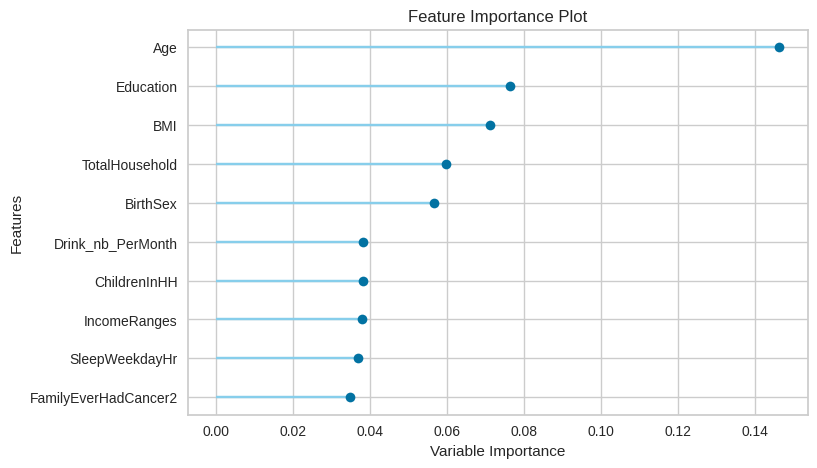

In [113]:
# 4. Comparer les modèles et extraire les 3 meilleurs
top3_models = compare_models(n_select=3)

# 5. Afficher le top 3
print("🏆 Top 3 des modèles sélectionnés par PyCaret :")
for i, model in enumerate(top3_models, start=1):
    print(f"{i}. {model}")

# 6. Évaluer le meilleur modèle graphiquement
evaluate_model(top3_models[0])  # Premier du classement

# 7. Importance des variables pour le meilleur modèle
plot_model(top3_models[0], plot='feature')

##### Conclusion : Les trois algorithme qui ressort sont :

    1. Random Forest
    2.LogisticRegression
    3.RidgeClassifier





### B. Mise en Pratiques des résultat obtenue: Évaluation de notre modéle

on va mettre en pratique un Random Forest et on ajoute un SMOTE

#### Random Forest

In [114]:
import sklearn
print(sklearn.__version__)

1.4.2


In [115]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler

# 1. Charger les données
df = pd.read_csv('df_final.csv')

# 2. Nettoyage : remplacer les -1 par NaN, supprimer les colonnes dupliquées
df.replace(-1, pd.NA, inplace=True)

# 3. Définir les variables
binary_vars = ['CutSkipMeals2','DiffPayMedBills','SmokeNow', 'MedConditions_Diabetes','MedConditions_HighBP','MedConditions_HeartCondition',
                 'MedConditions_LungDisease', 'MedConditions_Depression', 'BirthSex', 'FamilyEverHadCancer2']

ordinal_vars = ['GeneralHealth','HealthLimits_Pain', 'Nervous', 'IncomeRanges', 'Education']
string_categorical_vars = [
    'Mexican','PuertoRican','Cuban','OthHisp','Hisp_Cat','White','Black','AmerInd','AsInd',
    'Chinese','Filipino','Japanese','Korean','Vietnamese','OthAsian','OthPacIsl'
]
continuous_vars = [
    'Fruit2', 'Vegetables2', 'TimesStrengthTraining', 'Drink_nb_PerMonth',
    'ChildrenInHH', 'TotalHousehold', 'TimesSunburned', 'BMI', 'Age', 'SleepWeekdayHr'
]
target = 'EverHadCancer'


# 4. Suppression des colonnes dupliquées
df = df.loc[:, ~df.columns.duplicated()]

# 6. Sélection des variables et suppression des lignes incomplètes
features = binary_vars + ordinal_vars + continuous_vars + string_categorical_vars
df_model = df[features + [target]].dropna()

X = df_model[features]
y = df_model[target]

# 9. Split des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=142)

# 7. Prétraitement
# Préprocesseur avec ColumnTransformer
# L'ordre des transformations ici DÉFINIT l'ordre de sortie des features dans le pipeline
# et donc l'ordre attendu par le modèle final
transformers = [
    ('ord', OrdinalEncoder(), ordinal_vars),
    ('ohe', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), string_categorical_vars),
    ('scale', StandardScaler(), continuous_vars)
]

preprocessor = ColumnTransformer(
    transformers=transformers,
    remainder='passthrough'  # les variables binaires passent sans transformation
)

# Créer le pipeline complet, y compris SMOTE
# SMOTE est appliqué APRÈS le préprocesseur mais AVANT le classificateur.
pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('smote', SMOTE(random_state=142)), # Ajout de l'étape SMOTE
    ('model', RandomForestClassifier(n_estimators=1000, random_state=142))
])

# entrainement du modèle
pipeline.fit(X_train, y_train)

# Évaluation du modèle
y_pred = pipeline.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Random Forest Accuracy: 0.8475836431226765

Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.96      0.92       460
         1.0       0.44      0.18      0.25        78

    accuracy                           0.85       538
   macro avg       0.66      0.57      0.58       538
weighted avg       0.81      0.85      0.82       538



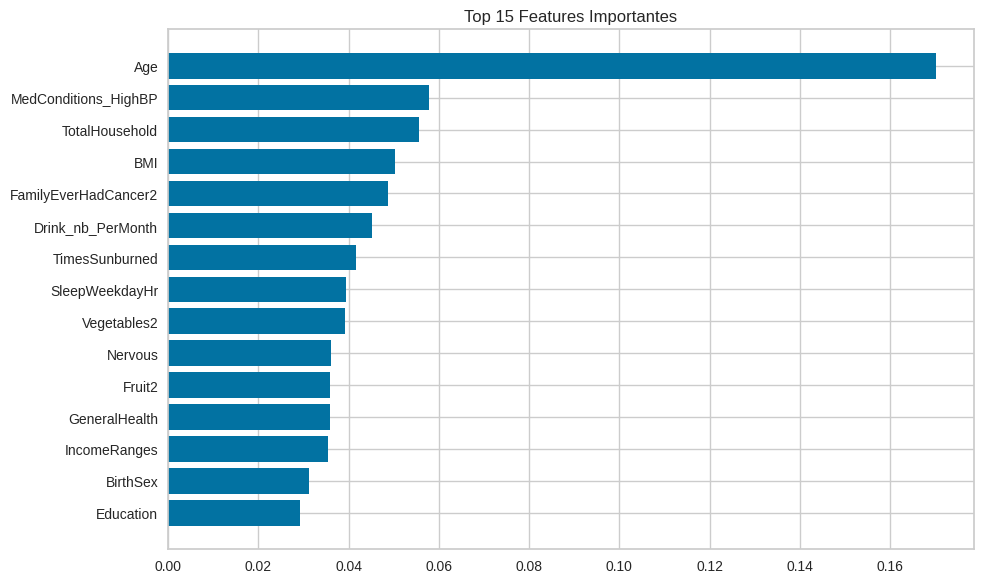

In [116]:
import matplotlib.pyplot as plt
model_rf = pipeline.named_steps['model']
importances = model_rf.feature_importances_

# Récupérer les noms des features finales
ohe = pipeline.named_steps['preprocess'].named_transformers_['ohe']
ohe_names = ohe.get_feature_names_out(string_categorical_vars)
final_features = ordinal_vars + list(ohe_names) + continuous_vars + binary_vars

# Plot
importances_df = pd.DataFrame({'Feature': final_features, 'Importance': importances})
top = importances_df.sort_values('Importance', ascending=False).head(15)

plt.figure(figsize=(10,6))
plt.barh(top['Feature'][::-1], top['Importance'][::-1])
plt.title("Top 15 Features Importantes")
plt.tight_layout()
plt.show()


In [117]:
# Pipeline sans SMOTE
pipeline_nosmote = Pipeline([
    ('preprocess', preprocessor),
    ('model', RandomForestClassifier(n_estimators=100, random_state=142))
])

# Pipeline avec SMOTE
pipeline_smote = ImbPipeline([
    ('preprocess', preprocessor),
    ('smote', SMOTE(random_state=142)),
    ('model', RandomForestClassifier(n_estimators=100, random_state=142))
])


In [118]:
pipeline_nosmote.fit(X_train, y_train)
y_pred_nosmote = pipeline_nosmote.predict(X_test)

pipeline_smote.fit(X_train, y_train)
y_pred_smote = pipeline_smote.predict(X_test)

print("📊 Résultats sans SMOTE :")
print("Accuracy :", accuracy_score(y_test, y_pred_nosmote))
print("Recall :", recall_score(y_test, y_pred_nosmote, average='macro'))
print("Precision :", precision_score(y_test, y_pred_nosmote, average='macro'))

print("\n📊 Résultats avec SMOTE :")
print("Accuracy :", accuracy_score(y_test, y_pred_smote))
print("Recall :", recall_score(y_test, y_pred_smote, average='macro'))
print("Precision :", precision_score(y_test, y_pred_smote, average='macro'))


📊 Résultats sans SMOTE :
Accuracy : 0.8475836431226765
Recall : 0.5116220735785953
Precision : 0.5789772727272727

📊 Résultats avec SMOTE :
Accuracy : 0.8382899628252788
Recall : 0.5540969899665552
Precision : 0.6164716471647165


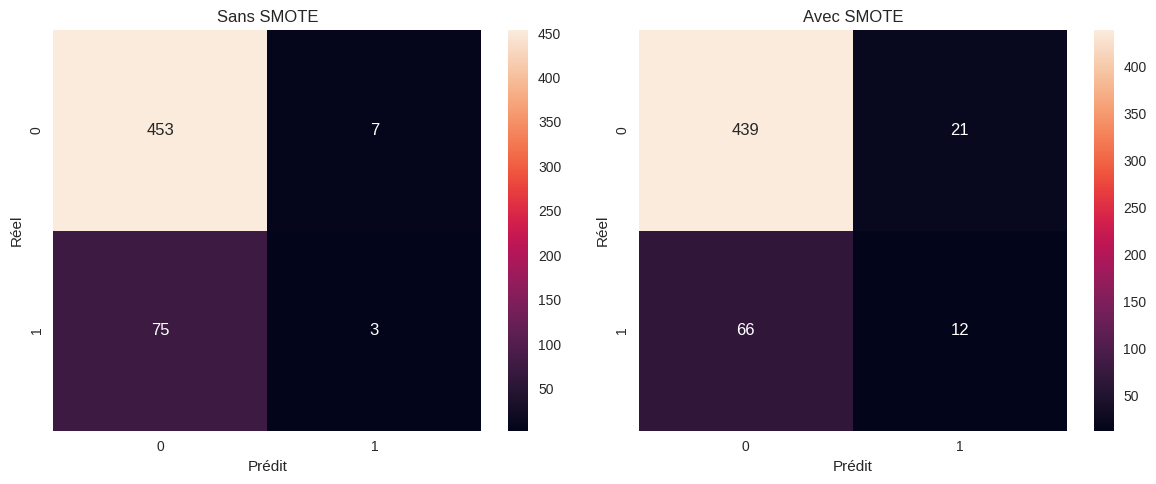

In [119]:
# 8. Matrices de confusion
import seaborn as sns
from sklearn.metrics import confusion_matrix

fig, axs = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_nosmote), annot=True, fmt='d', ax=axs[0])
axs[0].set_title('Sans SMOTE')
axs[0].set_xlabel('Prédit')
axs[0].set_ylabel('Réel')

sns.heatmap(confusion_matrix(y_test, y_pred_smote), annot=True, fmt='d', ax=axs[1])
axs[1].set_title('Avec SMOTE')
axs[1].set_xlabel('Prédit')
axs[1].set_ylabel('Réel')

plt.tight_layout()
plt.show()

Conclusion: on Obtient un résultat Satisfaisant mais on peut faire mieux, en faisant un ré-équilibrage manuel afin d'botenir un meilleur résultat.  

### C.Équilibrage Manuellement de l'échantillonage

##### Pycaret

In [120]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, recall_score, precision_score
import matplotlib.pyplot as plt

# 1. Chargement des données
df = pd.read_csv('df_final.csv')

# 2. Nettoyage : remplacer les -1 par NaN
df.replace(-1, pd.NA, inplace=True)
df = df.loc[:, ~df.columns.duplicated()]

# 3. Filtrage des colonnes utiles
binary_vars = ['CutSkipMeals2','DiffPayMedBills','SmokeNow', 'MedConditions_Diabetes','MedConditions_HighBP','MedConditions_HeartCondition',
                 'MedConditions_LungDisease', 'MedConditions_Depression', 'BirthSex', 'FamilyEverHadCancer2']

ordinal_vars = ['GeneralHealth','HealthLimits_Pain', 'Nervous', 'IncomeRanges', 'Education']
string_categorical_vars = [
    'Mexican','PuertoRican','Cuban','OthHisp','Hisp_Cat','White','Black','AmerInd','AsInd',
    'Chinese','Filipino','Japanese','Korean','Vietnamese','OthAsian','OthPacIsl'
]
continuous_vars = [
    'Fruit2', 'Vegetables2', 'TimesStrengthTraining', 'Drink_nb_PerMonth',
    'ChildrenInHH', 'TotalHousehold', 'TimesSunburned', 'BMI', 'Age', 'SleepWeekdayHr'
]
target = 'EverHadCancer'


# 5. Équilibrage : undersampling
df_cancer = df[df[target] == 1]
df_noncancer = df[df[target] == 0].sample(n=len(df_cancer), random_state=142)
df_balanced = pd.concat([df_cancer, df_noncancer]).sample(frac=1, random_state=142)

# 6. Sélection des variables et suppression des lignes incomplètes
features = binary_vars + ordinal_vars + continuous_vars + string_categorical_vars

# 7. Nettoyage final
df_model = df_balanced[features + [target]].dropna()

X = df_model[features]
y = df_model[target]

# 9. Split des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [121]:
# 9. Prétraitement
# Préprocesseur avec ColumnTransformer
# L'ordre des transformations ici DÉFINIT l'ordre de sortie des features dans le pipeline
# et donc l'ordre attendu par le modèle final
transformers = [
    ('ord', OrdinalEncoder(), ordinal_vars),
    ('ohe', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), string_categorical_vars),
    ('scale', StandardScaler(), continuous_vars)
]

preprocessor = ColumnTransformer(
    transformers=transformers,
    remainder='passthrough'  # les variables binaires passent sans transformation
)

# 10.Créer le pipeline complet,
pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('model', RandomForestClassifier(n_estimators=100, random_state=142))
])

# 11.entrainement du modèle
pipeline.fit(X_train, y_train)

# 12.Évaluation du modèle
y_pred = pipeline.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Random Forest Accuracy: 0.6198830409356725

Classification Report:
               precision    recall  f1-score   support

         0.0       0.61      0.54      0.58        81
         1.0       0.63      0.69      0.66        90

    accuracy                           0.62       171
   macro avg       0.62      0.62      0.62       171
weighted avg       0.62      0.62      0.62       171



,Description,Value
0,Session id,142
1,Target,EverHadCancer
2,Target type,Multiclass
3,Target mapping,"-1.0: 0, 0.0: 1, 1.0: 2"
4,Original data shape,"(7278, 42)"
5,Transformed data shape,"(7278, 42)"
6,Transformed train set shape,"(5094, 42)"
7,Transformed test set shape,"(2184, 42)"
8,Numeric features,41
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8477,0.8308,0.8477,0.8000,0.7953,0.4632,0.5297,0.8400
ridge,Ridge Classifier,0.8469,0.0000,0.8469,0.7656,0.7821,0.4463,0.5328,0.0380
et,Extra Trees Classifier,0.8467,0.8248,0.8467,0.7890,0.7935,0.4589,0.5254,0.7180
gbc,Gradient Boosting Classifier,0.8465,0.0000,0.8465,0.8046,0.8021,0.4741,0.5257,2.7890
lr,Logistic Regression,0.8459,0.0000,0.8459,0.7927,0.7934,0.4586,0.5228,1.3890
lda,Linear Discriminant Analysis,0.8445,0.0000,0.8445,0.7924,0.7937,0.4593,0.5182,0.0440
lightgbm,Light Gradient Boosting Machine,0.8408,0.8276,0.8408,0.7973,0.8061,0.4751,0.5069,1.3310
xgboost,Extreme Gradient Boosting,0.8357,0.8161,0.8357,0.7956,0.8061,0.4719,0.4944,0.4300
knn,K Neighbors Classifier,0.8261,0.7707,0.8261,0.7878,0.8012,0.4551,0.4695,0.0880
svm,SVM - Linear Kernel,0.8092,0.0000,0.8092,0.7715,0.7746,0.4257,0.4889,0.1520


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

Modèle sélectionné : RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=142, verbose=0,
                       warm_start=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

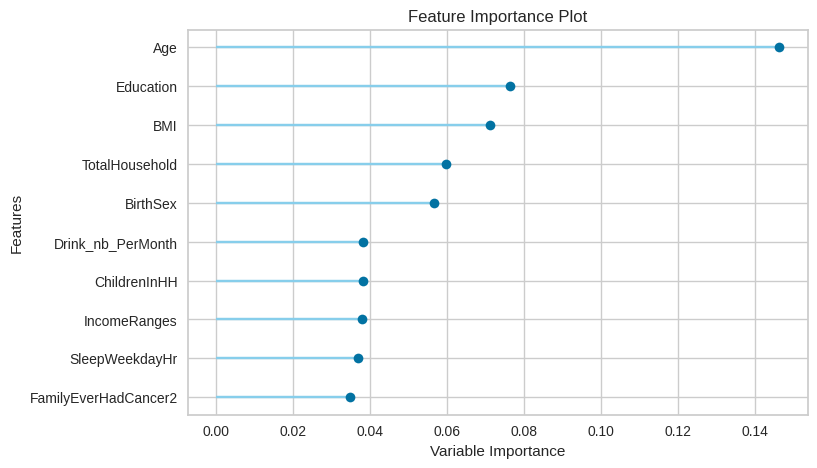

In [122]:
# 6. Initialiser l’environnement PyCaret
# 6. Initialiser l’environnement PyCaret
from pycaret.classification import *
clf_setup = setup(
    data=df_final,
    target='EverHadCancer',
    session_id=142,
    preprocess=True,  # encodage, normalisation, etc.
    ignore_features=[],  # tu peux exclure certaines colonnes si nécessaire
    categorical_features=None  # optionnel si PyCaret ne détecte pas tout seul
)

# 7. Comparer tous les modèles disponibles
best_model = compare_models()

# 8. Afficher les métriques du meilleur modèle
print("Modèle sélectionné :", best_model)

# 9. Évaluer graphiquement ce modèle
evaluate_model(best_model)

# 10. Interpréter l’importance des variables
plot_model(best_model, plot='feature')

# 11. (Optionnel) Sauvegarder le modèle
# save_model(best_model, 'modele_pycaret_cancer')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8477,0.8308,0.8477,0.8000,0.7953,0.4632,0.5297,0.8110
ridge,Ridge Classifier,0.8469,0.0000,0.8469,0.7656,0.7821,0.4463,0.5328,0.0380
et,Extra Trees Classifier,0.8467,0.8248,0.8467,0.7890,0.7935,0.4589,0.5254,0.8200
gbc,Gradient Boosting Classifier,0.8465,0.0000,0.8465,0.8046,0.8021,0.4741,0.5257,2.7070
lr,Logistic Regression,0.8459,0.0000,0.8459,0.7927,0.7934,0.4586,0.5228,1.3900
lda,Linear Discriminant Analysis,0.8445,0.0000,0.8445,0.7924,0.7937,0.4593,0.5182,0.0410
lightgbm,Light Gradient Boosting Machine,0.8408,0.8276,0.8408,0.7973,0.8061,0.4751,0.5069,1.4020
xgboost,Extreme Gradient Boosting,0.8357,0.8161,0.8357,0.7956,0.8061,0.4719,0.4944,0.3560
knn,K Neighbors Classifier,0.8261,0.7707,0.8261,0.7878,0.8012,0.4551,0.4695,0.0880
svm,SVM - Linear Kernel,0.8092,0.0000,0.8092,0.7715,0.7746,0.4257,0.4889,0.1500


Processing:   0%|          | 0/67 [00:00<?, ?it/s]

🏆 Top 3 des modèles sélectionnés par PyCaret :
1. RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=142, verbose=0,
                       warm_start=False)
2. RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, positive=False, random_state=142, solver='auto',
                tol=0.0001)
3. ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
          

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

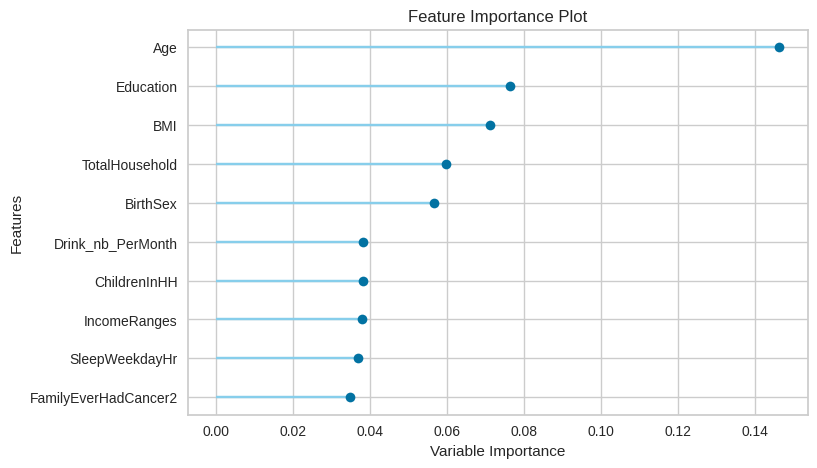

In [123]:
# 4. Comparer les modèles et extraire les 3 meilleurs
top3_models = compare_models(n_select=3)

# 5. Afficher le top 3
print("🏆 Top 3 des modèles sélectionnés par PyCaret :")
for i, model in enumerate(top3_models, start=1):
    print(f"{i}. {model}")

# 6. Évaluer le meilleur modèle graphiquement
evaluate_model(top3_models[0])  # Premier du classement

# 7. Importance des variables pour le meilleur modèle
plot_model(top3_models[0], plot='feature')

#### **Random Forest**

In [124]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1. Chargement des données
df = pd.read_csv('df_final.csv')

# 2. Nettoyage : remplacer les -1 par NaN
df.replace(-1, pd.NA, inplace=True)
df = df.loc[:, ~df.columns.duplicated()]

# 3. Filtrage des colonnes utiles
binary_vars = ['CutSkipMeals2','DiffPayMedBills','SmokeNow', 'MedConditions_Diabetes','MedConditions_HighBP','MedConditions_HeartCondition',
                 'MedConditions_LungDisease', 'MedConditions_Depression', 'BirthSex', 'FamilyEverHadCancer2']

ordinal_vars = ['GeneralHealth','HealthLimits_Pain', 'Nervous', 'IncomeRanges', 'Education']

string_categorical_vars = [
    'Mexican','PuertoRican','Cuban','OthHisp','Hisp_Cat','White','Black','AmerInd','AsInd',
    'Chinese','Filipino','Japanese','Korean','Vietnamese','OthAsian','OthPacIsl'
]
continuous_vars = [
    'Fruit2', 'Vegetables2', 'TimesStrengthTraining', 'Drink_nb_PerMonth',
    'ChildrenInHH', 'TotalHousehold', 'TimesSunburned', 'BMI', 'Age', 'SleepWeekdayHr'
]
target = 'EverHadCancer'

# 5. Équilibrage : undersampling
df_cancer = df[df[target] == 1]
df_noncancer = df[df[target] == 0].sample(n=len(df_cancer), random_state=142)
df_balanced = pd.concat([df_cancer, df_noncancer]).sample(frac=1, random_state=142).reset_index(drop=True)

print("✅ Distribution équilibrée :")
print(df_balanced[target].value_counts())

# 6. Sélection des variables et suppression des lignes incomplètes
features = binary_vars + ordinal_vars + continuous_vars + string_categorical_vars

# 7. Nettoyage final
df_model = df_balanced[features + [target]].dropna()

X = df_model[features]
y = df_model[target]

# 8. Split des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=142)



✅ Distribution équilibrée :
EverHadCancer
1.0    1073
0.0    1073
Name: count, dtype: int64


In [125]:
# 9. Prétraitement
# Préprocesseur avec ColumnTransformer
# L'ordre des transformations ici DÉFINIT l'ordre de sortie des features dans le pipeline
# et donc l'ordre attendu par le modèle final
transformers = [
    ('ord', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), ordinal_vars), # Added handle_unknown and unknown_value
    ('ohe', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), string_categorical_vars),
    ('scale', StandardScaler(), continuous_vars)
]

preprocessor = ColumnTransformer(
    transformers=transformers,
    remainder='passthrough'  # les variables binaires passent sans transformation
)

# 10.Créer le pipeline complet,
pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('model', RandomForestClassifier(n_estimators=100, random_state=142))
])

# 11.entrainement du modèle
pipeline.fit(X_train, y_train)

# 12.Évaluation du modèle
y_pred = pipeline.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Random Forest Accuracy: 0.7076023391812866

Classification Report:
               precision    recall  f1-score   support

         0.0       0.74      0.69      0.71        90
         1.0       0.68      0.73      0.70        81

    accuracy                           0.71       171
   macro avg       0.71      0.71      0.71       171
weighted avg       0.71      0.71      0.71       171



In [126]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Pipeline pour la régression logistique
pipeline_logreg = Pipeline([
    ('preprocess', preprocessor),
    ('model', LogisticRegression(max_iter=1000, random_state=142))
])

# Entraîner le modèle
pipeline_logreg.fit(X_train, y_train)


Pipeline(memory=None,
         steps=[('preprocess',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('ord',
                                                  OrdinalEncoder(categories='auto',
                                                                 dtype=<class 'numpy.float64'>,
                                                                 encoded_missing_value=nan,
                                                                 handle_unknown='use_encoded_value',
                                                                 max_categories=None,
                                                                 min_frequency=None,
                                                                 unknown_value=-1),
                                                  ['Gener...
                                                   'TimesSunburned', 'BMI',
                                                   'Age', 'SleepWeekdayHr'])],
                                   verbose=False,
                                   verbose_feature_names_out=True)),
                ('model',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=1000,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=142,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

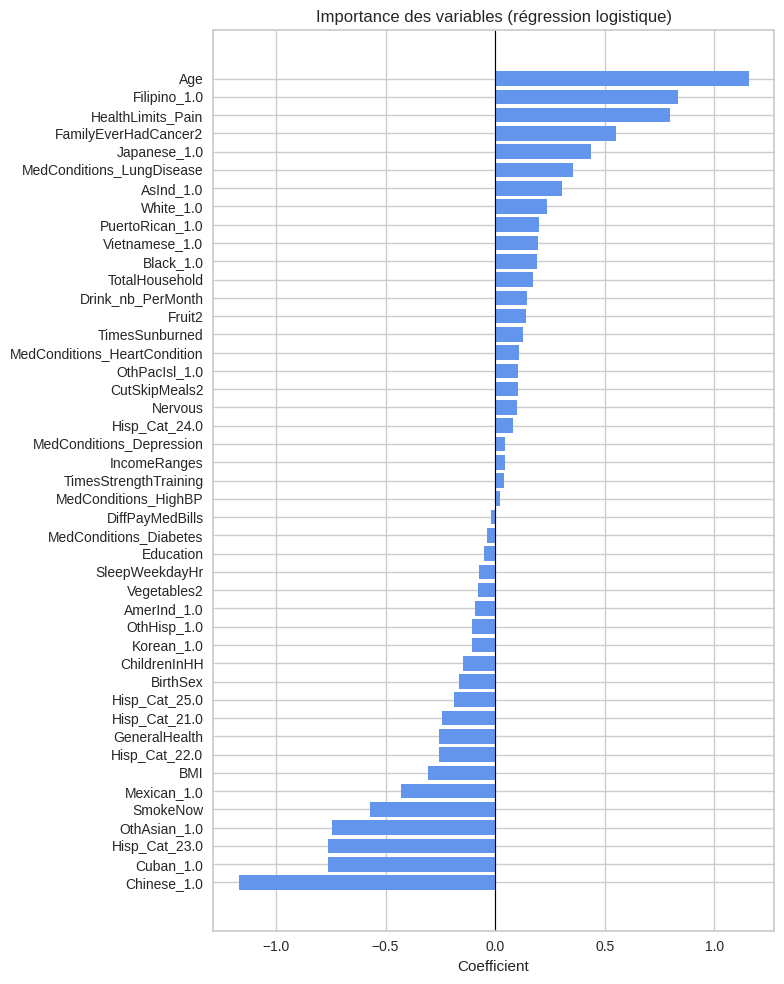

In [127]:
# Extraire les coefficients du modèle
model_logreg = pipeline_logreg.named_steps['model']
coefficients = model_logreg.coef_[0]

# Récupérer les noms des variables transformées
ohe = pipeline_logreg.named_steps['preprocess'].named_transformers_['ohe']
ohe_names = ohe.get_feature_names_out(string_categorical_vars)

final_features = ordinal_vars + list(ohe_names) + continuous_vars + binary_vars

# Créer DataFrame avec les coefficients
coef_df = pd.DataFrame({
    'Feature': final_features,
    'Importance': coefficients
}).sort_values(by='Importance')

# Affichage
plt.figure(figsize=(8, 10))
plt.barh(coef_df['Feature'], coef_df['Importance'], color='cornflowerblue')
plt.axvline(0, color='black', linewidth=0.8)
plt.title("Importance des variables (régression logistique)")
plt.xlabel("Coefficient")
plt.tight_layout()
plt.show()


##### Graphique des coefficients (avec barres négatives ou positives) :

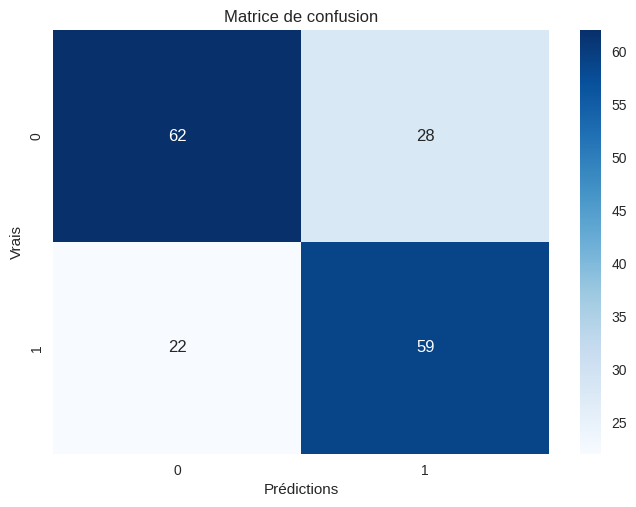

In [128]:
# Tracer
#Ci dessous la matrice de confusion

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Exemple : y_true = vraies étiquettes, y_pred = prédictions du modèle
cm = confusion_matrix(y_test, y_pred)

# Affichage avec seaborn (matrice en couleur)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prédictions')
plt.ylabel('Vrais')
plt.title('Matrice de confusion')
plt.show()

### **D. Cross Validation: Vers une validation robuste**

Une fois les données équilibrées avec SMOTE, il devient essentiel de tester la stabilité de notre modèle.
En effet, les résultats obtenus peuvent dépendre du hasard dans le découpage des données (train/test split).

Nous allons donc utiliser la validation croisée (cross-validation), qui consiste à répéter plusieurs fois l'entraînement sur différentes portions du jeu de données, afin de fournir une moyenne plus fiable des performances.

In [129]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Pipeline déjà défini avec preprocessing + modèle
scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')

print("Scores individuels :", scores)
print("✅ Moyenne de l'accuracy :", scores.mean())


Scores individuels : [0.66081871 0.73529412 0.72941176 0.72941176 0.67647059]
✅ Moyenne de l'accuracy : 0.7062813897488821


##### Equilibrage avec Undersampling

In [130]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1. Chargement des données
df = pd.read_csv('df_final.csv')
df.replace(-1, pd.NA, inplace=True)
df = df.loc[:, ~df.columns.duplicated()]
target = 'EverHadCancer'

# 2. Variables
binary_vars = ['CutSkipMeals2','DiffPayMedBills','SmokeNow', 'MedConditions_Diabetes','MedConditions_HighBP','MedConditions_HeartCondition',
                 'MedConditions_LungDisease', 'MedConditions_Depression', 'BirthSex', 'FamilyEverHadCancer2']

ordinal_vars = ['GeneralHealth','HealthLimits_Pain', 'Nervous', 'IncomeRanges', 'Education']
string_categorical_vars = [
    'Mexican','PuertoRican','Cuban','OthHisp','Hisp_Cat','White','Black','AmerInd','AsInd',
    'Chinese','Filipino','Japanese','Korean','Vietnamese','OthAsian','OthPacIsl'
]
continuous_vars = [
    'Fruit2', 'Vegetables2', 'TimesStrengthTraining', 'Drink_nb_PerMonth',
    'ChildrenInHH', 'TotalHousehold', 'TimesSunburned', 'BMI', 'Age', 'SleepWeekdayHr'
]
target = 'EverHadCancer'

features = binary_vars + ordinal_vars + continuous_vars + string_categorical_vars

# 3. Équilibrage
df_cancer = df[df[target] == 1]
df_noncancer = df[df[target] == 0].sample(n=len(df_cancer), random_state=142)
df_balanced = pd.concat([df_cancer, df_noncancer]).sample(frac=1, random_state=142).reset_index(drop=True)

# 4. Sélection et nettoyage
df_model = df_balanced[features + [target]].dropna()
X = df_model[features]
y = df_model[target]

# 5. Préprocessing
preprocessor = ColumnTransformer([
    ('ord', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), ordinal_vars), # Added handle_unknown and unknown_value
    ('ohe', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), string_categorical_vars),
    ('scale', StandardScaler(), continuous_vars)
], remainder='passthrough')

# 6. Pipeline
pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('model', RandomForestClassifier(n_estimators=100, random_state=142))
])

# 7. Validation croisée
scores = cross_validate(
    pipeline,
    X, y,
    cv=5,
    scoring=['accuracy', 'precision_macro', 'recall_macro', 'f1_macro'],
    return_train_score=False
)

# 8. Résultats
print("✅ Moyenne de l'accuracy       :", round(scores['test_accuracy'].mean(), 3))
print("✅ Moyenne du recall (macro)   :", round(scores['test_recall_macro'].mean(), 3))
print("✅ Moyenne de la précision     :", round(scores['test_precision_macro'].mean(), 3))
print("✅ Moyenne du F1-score         :", round(scores['test_f1_macro'].mean(), 3))
print("ℹ️  Écart-type Accuracy         :", round(np.std(scores['test_accuracy']), 3))


✅ Moyenne de l'accuracy       : 0.706
✅ Moyenne du recall (macro)   : 0.707
✅ Moyenne de la précision     : 0.708
✅ Moyenne du F1-score         : 0.706
ℹ️  Écart-type Accuracy         : 0.031


##### Equilibrage avec SMOTE

In [131]:
from sklearn.model_selection import cross_validate
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler

# 1. Chargement
df = pd.read_csv('df_final.csv')
df.replace(-1, pd.NA, inplace=True)
df = df.loc[:, ~df.columns.duplicated()]
target = 'EverHadCancer'

# 2. Variables
binary_vars = ['CutSkipMeals2','DiffPayMedBills','SmokeNow', 'MedConditions_Diabetes','MedConditions_HighBP','MedConditions_HeartCondition',
                 'MedConditions_LungDisease', 'MedConditions_Depression', 'BirthSex', 'FamilyEverHadCancer2']

ordinal_vars = ['GeneralHealth','HealthLimits_Pain', 'Nervous', 'IncomeRanges', 'Education']
string_categorical_vars = [
    'Mexican','PuertoRican','Cuban','OthHisp','Hisp_Cat','White','Black','AmerInd','AsInd',
    'Chinese','Filipino','Japanese','Korean','Vietnamese','OthAsian','OthPacIsl'
]
continuous_vars = [
    'Fruit2', 'Vegetables2', 'TimesStrengthTraining', 'Drink_nb_PerMonth',
    'ChildrenInHH', 'TotalHousehold', 'TimesSunburned', 'BMI', 'Age', 'SleepWeekdayHr'
]

features = binary_vars + ordinal_vars + continuous_vars + string_categorical_vars

# 3. Données
df_model = df[features + [target]].dropna()
X = df_model[features]
y = df_model[target]

# 4. Prétraitement
preprocessor = ColumnTransformer([
    ('ord', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), ordinal_vars), # Added handle_unknown and unknown_value
    ('ohe', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), string_categorical_vars),
    ('scale', StandardScaler(), continuous_vars)
], remainder='passthrough')

# 5. Pipeline avec SMOTE
pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('model', RandomForestClassifier(n_estimators=100, random_state=142))
])

# 6. Cross-validation
scores = cross_validate(
    pipeline,
    X, y,
    cv=5,
    scoring=['accuracy', 'precision_macro', 'recall_macro', 'f1_macro'],
    return_train_score=False
)

# 7. Résultats
print("✅ Moyenne Accuracy :", round(scores['test_accuracy'].mean(), 3))
print("✅ Moyenne Recall   :", round(scores['test_recall_macro'].mean(), 3))
print("✅ Moyenne Précision:", round(scores['test_precision_macro'].mean(), 3))
print("✅ Moyenne F1-score :", round(scores['test_f1_macro'].mean(), 3))
print("ℹ️  Écart-type Accuracy :", round(np.std(scores['test_accuracy']), 3))


✅ Moyenne Accuracy : 0.84
✅ Moyenne Recall   : 0.566
✅ Moyenne Précision: 0.655
✅ Moyenne F1-score : 0.577
ℹ️  Écart-type Accuracy : 0.01


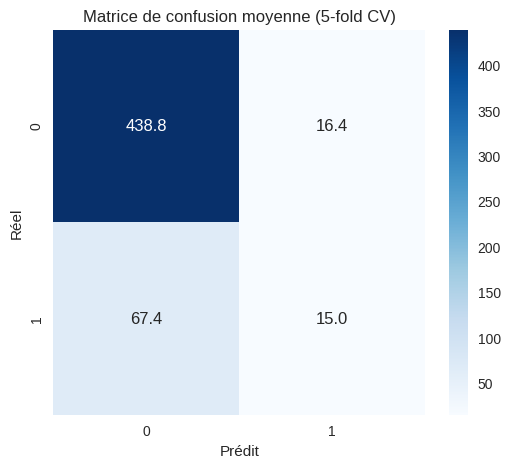

In [132]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=142)

conf_matrices = []

for train_index, test_index in kf.split(X, y):
    X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]

    pipeline.fit(X_train_cv, y_train_cv)
    y_pred_cv = pipeline.predict(X_test_cv)

    cm = confusion_matrix(y_test_cv, y_pred_cv)
    conf_matrices.append(cm)

# Moyenne des matrices de confusion
avg_conf_matrix = np.mean(conf_matrices, axis=0)

# Affichage
plt.figure(figsize=(6, 5))
sns.heatmap(avg_conf_matrix, annot=True, fmt='.1f', cmap='Blues')
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.title("Matrice de confusion moyenne (5-fold CV)")
plt.show()


### **E. Régression Logistique: Comparaison avec un modèle linéaire (Régression Logistique)**

Pour mieux interpréter les résultats et les variables influentes, nous allons maintenant entraîner un modèle de Régression Logistique.
Ce modèle, plus simple et linéaire, offre l’avantage de fournir des coefficients interprétables pour chaque variable.

Cela nous permettra de comparer les performances et de identifier les facteurs de risque les plus associés au cancer.

##### Equilibrage avec Undersampling

In [133]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1. Chargement des données
df = pd.read_csv('df_final.csv')
df.replace(-1, pd.NA, inplace=True)
df = df.loc[:, ~df.columns.duplicated()]
target = 'EverHadCancer'

# 2. Variables
binary_vars = ['CutSkipMeals2','DiffPayMedBills','SmokeNow', 'MedConditions_Diabetes','MedConditions_HighBP','MedConditions_HeartCondition',
                 'MedConditions_LungDisease', 'MedConditions_Depression', 'BirthSex', 'FamilyEverHadCancer2']

ordinal_vars = ['GeneralHealth','HealthLimits_Pain', 'Nervous', 'IncomeRanges', 'Education']
string_categorical_vars = [
    'Mexican','PuertoRican','Cuban','OthHisp','Hisp_Cat','White','Black','AmerInd','AsInd',
    'Chinese','Filipino','Japanese','Korean','Vietnamese','OthAsian','OthPacIsl'
]
continuous_vars = [
    'Fruit2', 'Vegetables2', 'TimesStrengthTraining', 'Drink_nb_PerMonth',
    'ChildrenInHH', 'TotalHousehold', 'TimesSunburned', 'BMI', 'Age', 'SleepWeekdayHr'
]

features = binary_vars + ordinal_vars + continuous_vars + string_categorical_vars

# 3. Équilibrage
df_cancer = df[df[target] == 1]
df_noncancer = df[df[target] == 0].sample(n=len(df_cancer), random_state=142)
df_balanced = pd.concat([df_cancer, df_noncancer]).sample(frac=1, random_state=142).reset_index(drop=True)

# 4. Sélection et nettoyage
df_model = df_balanced[features + [target]].dropna()
X = df_model[features]
y = df_model[target]

# 9. Split des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=142)


In [134]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

# 5. Préprocessing
preprocessor = ColumnTransformer([
    ('ord', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), ordinal_vars), # Added handle_unknown and unknown_value
    ('ohe', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), string_categorical_vars),
    ('scale', StandardScaler(), continuous_vars)
], remainder='passthrough')

# 6. Pipeline
pipeline_logreg = Pipeline([
    ('preprocess', preprocessor),
    ('model', LogisticRegression(max_iter=1000, random_state=142))
])

# Validation croisée
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=142)

scores_logreg = cross_validate(
    pipeline_logreg,
    X, y,
    cv=cv,
    scoring=['accuracy', 'precision', 'recall']
)

print("✅ Logistic Regression")
print("Accuracy moyenne :", round(scores_logreg['test_accuracy'].mean(), 3))
print("Recall moyen     :", round(scores_logreg['test_recall'].mean(), 3))
print("Précision moyenne :", round(scores_logreg['test_precision'].mean(), 3))


✅ Logistic Regression
Accuracy moyenne : 0.693
Recall moyen     : 0.694
Précision moyenne : 0.679


##### Equilibrage avec SMOTE

In [135]:
from sklearn.model_selection import cross_validate
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler

# 1. Chargement
df = pd.read_csv('df_final.csv')
df.replace(-1, pd.NA, inplace=True)
df = df.loc[:, ~df.columns.duplicated()]
target = 'EverHadCancer'

# 2. Variables
binary_vars = ['CutSkipMeals2','DiffPayMedBills','SmokeNow', 'MedConditions_Diabetes','MedConditions_HighBP','MedConditions_HeartCondition',
                 'MedConditions_LungDisease', 'MedConditions_Depression', 'BirthSex', 'FamilyEverHadCancer2']

ordinal_vars = ['GeneralHealth','HealthLimits_Pain', 'Nervous', 'IncomeRanges', 'Education']
string_categorical_vars = [
    'Mexican','PuertoRican','Cuban','OthHisp','Hisp_Cat','White','Black','AmerInd','AsInd',
    'Chinese','Filipino','Japanese','Korean','Vietnamese','OthAsian','OthPacIsl'
]
continuous_vars = [
    'Fruit2', 'Vegetables2', 'TimesStrengthTraining', 'Drink_nb_PerMonth',
    'ChildrenInHH', 'TotalHousehold', 'TimesSunburned', 'BMI', 'Age', 'SleepWeekdayHr'
]
features = binary_vars + ordinal_vars + continuous_vars + string_categorical_vars

# 3. Données
df_model = df[features + [target]].dropna()
X = df_model[features]
y = df_model[target]

In [136]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

# 5. Préprocessing
preprocessor = ColumnTransformer([
    ('ord', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), ordinal_vars), # Added handle_unknown and unknown_value
    ('ohe', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), string_categorical_vars),
    ('scale', StandardScaler(), continuous_vars)
], remainder='passthrough')

# 6. Pipeline
pipeline_logreg = Pipeline([
    ('preprocess', preprocessor),
    ('smote', SMOTE(random_state=42)),  # ✅ étape SMOTE ajoutée ici
    ('model', LogisticRegression(max_iter=1000, random_state=142))
])


# Validation croisée
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=142)

scores_logreg = cross_validate(
    pipeline_logreg,
    X, y,
    cv=cv,
    scoring=['accuracy', 'precision', 'recall']
)

print("✅ Logistic Regression")
print("Accuracy moyenne :", round(scores_logreg['test_accuracy'].mean(), 3))
print("Recall moyen     :", round(scores_logreg['test_recall'].mean(), 3))
print("Précision moyenne :", round(scores_logreg['test_precision'].mean(), 3))


✅ Logistic Regression
Accuracy moyenne : 0.696
Recall moyen     : 0.709
Précision moyenne : 0.295


## **Conclusion**

Dans ce projet, nous avons construit et comparé plusieurs modèles prédictifs afin d’identifier les facteurs associés à la survenue d’un cancer.

Nous avons suivi une démarche rigoureuse en plusieurs étapes :

Un nettoyage des données (valeurs manquantes, variables dupliquées),
Une préparation des variables via encodage et normalisation,
Un équilibrage du jeu de données avec undersampling et SMOTE,

Puis des expérimentations avec plusieurs modèles :


*   Random Forest,
*   Régression logistique,
*   Et une validation croisée pour stabiliser les résultats.


Les performances des modèles (accuracy, recall, précision) ont montré que :


*   Le **Random Forest** fournit une bonne performance globale avec des variables
importantes comme l’âge, le sommeil, l'alimentation ou les difficultés financières.
*   La **Régression Logistique** apporte une meilleure **interprétabilité**, en permettant d’observer clairement les effets **positifs ou négatifs** des variables.
*   L'ajout du **SMOTE** a permis d'améliorer la sensibilité (recall) du modèle sans trop dégrader la précision.

Ce travail ouvre la voie à des applications utiles en prévention, en identifiant les profils à risque, mais nécessite d’être validé sur d’autres échantillons pour une généralisation.

Pour une application en production, nous recommanderions donc d’opter pour Random Forest + undersampling + validation croisée. Cela permet d’avoir un modèle plus juste, capable de détecter les cas positifs tout en limitant les fausses alertes.

### VII. Modèle Random Forest avec undersampling et validation croisée

In [137]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn.metrics import make_scorer, accuracy_score, recall_score, precision_score, f1_score
from sklearn.utils import resample

# 1. Chargement des données
df = pd.read_csv('df_final.csv')

# 2. Nettoyage : remplacer les -1 par NaN
df.replace(-1, pd.NA, inplace=True)
df = df.loc[:, ~df.columns.duplicated()]

# 3. Filtrage des colonnes utiles
binary_vars = ['CutSkipMeals2','DiffPayMedBills','SmokeNow', 'MedConditions_Diabetes','MedConditions_HighBP','MedConditions_HeartCondition',
                 'MedConditions_LungDisease', 'MedConditions_Depression', 'BirthSex', 'FamilyEverHadCancer2']

ordinal_vars = ['GeneralHealth','HealthLimits_Pain', 'Nervous', 'IncomeRanges', 'Education']
string_vars = [
    'Mexican','PuertoRican','Cuban','OthHisp','Hisp_Cat','White','Black','AmerInd','AsInd',
    'Chinese','Filipino','Japanese','Korean','Vietnamese','OthAsian','OthPacIsl'
]
continuous_vars = [
    'Fruit2', 'Vegetables2', 'TimesStrengthTraining', 'Drink_nb_PerMonth',
    'ChildrenInHH', 'TotalHousehold', 'TimesSunburned', 'BMI', 'Age', 'SleepWeekdayHr'
]
target = 'EverHadCancer'

features = binary_vars + ordinal_vars + string_vars + continuous_vars
df = df[features + [target]].dropna()

# 3. Undersampling
df_minority = df[df[target] == 1]# personne atteint d'un Cancer
df_majority = df[df[target] == 0].sample(n=len(df_cancer), random_state=142)# personne non atteint d'un Cancer
df_majority_down = resample(df_majority, replace=False, n_samples=len(df_minority), random_state=142)
df_balanced = pd.concat([df_majority_down, df_minority]).sample(frac=1, random_state=142)

X = df_balanced[features]
y = df_balanced[target]

# 4. Préprocessing
preprocessor = ColumnTransformer(transformers=[
    ('ord', OrdinalEncoder(), ordinal_vars),
    ('ohe', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), string_vars),
    ('scale', StandardScaler(), continuous_vars)
], remainder='passthrough')

# 5. Pipeline complet
pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('model', RandomForestClassifier(n_estimators=100, random_state=42))
])

# 6. Cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'recall': make_scorer(recall_score),
    'precision': make_scorer(precision_score),
    'f1': make_scorer(f1_score)
}

# 7. Résultats
results = {}
for name, scorer in scoring.items():
    scores = cross_val_score(pipeline, X, y, cv=cv, scoring=scorer)
    results[name] = (scores.mean(), scores.std())

# 8. Affichage
print("✅ Résultats (Random Forest + undersampling + CV) :")
for metric, (mean, std) in results.items():
    print(f"{metric.capitalize():<10} : {mean:.3f} (±{std:.3f})")


✅ Résultats (Random Forest + undersampling + CV) :
Accuracy   : 0.707 (±0.026)
Recall     : 0.748 (±0.036)
Precision  : 0.692 (±0.024)
F1         : 0.719 (±0.026)


#####Conclusion :

Les résultats montrent que le modèle Random Forest avec undersampling et validation croisée présente un bon compromis entre rappel élevé (bonne détection des cas positifs), précision acceptable (peu de fausses alertes) et stabilité des résultats. Il apparaît ainsi comme le modèle le plus fiable et équilibré pour une éventuelle mise en production.

Nous recommandons ce modèle comme solution par défaut pour un système automatisé de détection de risque de cancer, en raison de sa robustesse, de sa capacité à gérer les données déséquilibrées et de ses performances globales solides.
